# 0. Imports, Constants

In [23]:
### ====================== ###
### Python packages
### ====================== ###

# Public packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime
from sklearn import preprocessing
from IPython.display import display as iDisplay, Markdown, Latex
import seaborn as sns
from scipy.stats import kendalltau, pearsonr, spearmanr
pd.options.mode.chained_assignment = None  # default='warn'

# Custom Helpers
from helpers import timestamp_to_unix_seconds as unix_seconds # Timestamps to Unix Seconds
from helpers import timestamp_to_unix_milliseconds as unix_milliseconds # Timestamps to Unix Milliseconds
le = preprocessing.LabelEncoder()

### ====================== ###
### Global Functions
### ====================== ###

# Frequency Bands, Electrodes, Gaze Thresholds, and Directory to the user data for this report.
_FREQUENCY_BANDS = ['Theta','Alpha','Beta','Gamma']
_ELECTRODES = ['AF7','AF8']
_FREQUENCY_COLORS = ['red', 'blue', 'green', 'orange']
_GAZE_THRESHOLD = 250.0
_DATA_DIR = './data/'

# Generate an output directory.
_OUTPUT_DIR = os.path.join(_DATA_DIR, f'outputs_{datetime.datetime.now().strftime("%Y-%m-%d_%H-%M-%S")}/')
try: os.makedirs(_OUTPUT_DIR)
except OSError as e:
    if e.errno != errno.EEXIST: raise  # This was not a "directory exist" error..

# Lists of objects in the scene
_STATIC_OBJECTS = [
    'NorthSidewalk', 'SouthSidewalk',
    'NorthWalkingPole', 'NorthDiagonalPole', 'NorthWalkingSignal', 'NorthCarSignal',
    'SouthWalkingPole', 'SouthDiagonalPole', 'SouthWalkingSignal', 'SouthCarSignal',
    'RoadEast', 'RoadWest', 'RoadCrosswalk',
    'NE_Tree_10', 'NE_Tree_30', 'NE_Tree_50',
    'NW_Tree_10', 'NW_Tree_30', 'NW_Tree_50',
    'SE_Tree_10', 'SE_Tree_30', 'SE_Tree_50',
    'SW_Tree_10', 'SW_Tree_30', 'SW_Tree_50']
_DYNAMIC_OBJECTS = [
    'Car1-Detailed', 'Car2-Detailed', 'Car3-Detailed', 'Car4-Detailed', 'Car5-Detailed',
    'Sedan1-Detailed', 'Sedan2-Detailed', 'Sedan3-Detailed', 'Sedan4-Detailed', 'Sedan5-Detailed',
    'Jeep2-Detailed', 'Jeep3-Detailed', 'Jeep4-Detailed', 'Jeep5-Detailed',
    'SportCar1-Detailed', 'SportCar2-Detailed', 'SportCar3-Detailed', 'SportCar4-Detailed', 'SportCar5-Detailed',
    'MicroBus1-Detailed', 'MicroBus2-Detailed', 'MicroBus3-Detailed', 'MicroBus4-Detailed', 'MicroBus5-Detailed',
    'Truck1-Detailed',
    'HighMale2', 'LowMale2', 'HighFemale2', 'LowFemale2']

# Objects to Categories Dictionaries
_OBJECT_TYPE_DICT = {
    'NorthSidewalk':'Sidewalk',
    'SouthSidewalk':'Sidewalk',
    'RoadEast':'Road',
    'RoadWest':'Road',
    'RoadCrosswalk':'Road',
    'NorthWalkingPole':'SignalPole',
    'NorthDiagonalPole':'SignalPole',
    'SouthWalkingPole':'SignalPole',
    'SouthDiagonalPole':'SignalPole',
    'NorthWalkingSignal':'PedestrianSignal',
    'SouthWalkingSignal':'PedestrianSignal',
    'NorthCarSignal':'VehicleSignal',
    'SouthCarSignal':'VehicleSignal',
    'NE_Tree_10':'Tree',
    'NE_Tree_30':'Tree',
    'NE_Tree_50':'Tree',
    'NW_Tree_10':'Tree',
    'NW_Tree_30':'Tree',
    'NW_Tree_50':'Tree',
    'SE_Tree_10':'Tree',
    'SE_Tree_30':'Tree',
    'SE_Tree_50':'Tree',
    'SW_Tree_10':'Tree',
    'SW_Tree_30':'Tree',
    'SW_Tree_50':'Tree',
    'Car1-Detailed':'Vehicle',
    'Car2-Detailed':'Vehicle',
    'Car3-Detailed':'Vehicle',
    'Car4-Detailed':'Vehicle',
    'Car5-Detailed':'Vehicle',
    'Sedan1-Detailed':'Vehicle',
    'Sedan2-Detailed':'Vehicle',
    'Sedan3-Detailed':'Vehicle',
    'Sedan4-Detailed':'Vehicle',
    'Sedan5-Detailed':'Vehicle',
    'Jeep2-Detailed':'Vehicle',
    'Jeep3-Detailed':'Vehicle',
    'Jeep4-Detailed':'Vehicle',
    'Jeep5-Detailed':'Vehicle',
    'SportCar1-Detailed':'Vehicle',
    'SportCar2-Detailed':'Vehicle',
    'SportCar3-Detailed':'Vehicle',
    'SportCar4-Detailed':'Vehicle',
    'SportCar5-Detailed':'Vehicle',
    'MicroBus1-Detailed':'Vehicle',
    'MicroBus2-Detailed':'Vehicle',
    'MicroBus3-Detailed':'Vehicle',
    'MicroBus4-Detailed':'Vehicle',
    'MicroBus5-Detailed':'Vehicle',
    'Truck1-Detailed':'Vehicle',
    'HighMale2':'Pedestrian',
    'LowMale2':'Pedestrian',
    'HighFemale2':'Pedestrian',
    'LowFemale2':'Pedestrian'
}
_OBJECT_TYPE_UNIQUE = set(_OBJECT_TYPE_DICT.values())

_OBJECT_STATE_DICT = {
    'NorthSidewalk':'Static',
    'SouthSidewalk':'Static',
    'RoadEast':'Static',
    'RoadWest':'Static',
    'RoadCrosswalk':'Static',
    'NorthWalkingPole':'Static',
    'NorthDiagonalPole':'Static',
    'SouthWalkingPole':'Static',
    'SouthDiagonalPole':'Static',
    'NorthWalkingSignal':'Static',
    'SouthWalkingSignal':'Static',
    'NorthCarSignal':'Static',
    'SouthCarSignal':'Static',
    'NE_Tree_10':'Static',
    'NE_Tree_30':'Static',
    'NE_Tree_50':'Static',
    'NW_Tree_10':'Static',
    'NW_Tree_30':'Static',
    'NW_Tree_50':'Static',
    'SE_Tree_10':'Static',
    'SE_Tree_30':'Static',
    'SE_Tree_50':'Static',
    'SW_Tree_10':'Static',
    'SW_Tree_30':'Static',
    'SW_Tree_50':'Static',
    'Car1-Detailed':'Dynamic',
    'Car2-Detailed':'Dynamic',
    'Car3-Detailed':'Dynamic',
    'Car4-Detailed':'Dynamic',
    'Car5-Detailed':'Dynamic',
    'Sedan1-Detailed':'Dynamic',
    'Sedan2-Detailed':'Dynamic',
    'Sedan3-Detailed':'Dynamic',
    'Sedan4-Detailed':'Dynamic',
    'Sedan5-Detailed':'Dynamic',
    'Jeep2-Detailed':'Dynamic',
    'Jeep3-Detailed':'Dynamic',
    'Jeep4-Detailed':'Dynamic',
    'Jeep5-Detailed':'Dynamic',
    'SportCar1-Detailed':'Dynamic',
    'SportCar2-Detailed':'Dynamic',
    'SportCar3-Detailed':'Dynamic',
    'SportCar4-Detailed':'Dynamic',
    'SportCar5-Detailed':'Dynamic',
    'MicroBus1-Detailed':'Dynamic',
    'MicroBus2-Detailed':'Dynamic',
    'MicroBus3-Detailed':'Dynamic',
    'MicroBus4-Detailed':'Dynamic',
    'MicroBus5-Detailed':'Dynamic',
    'Truck1-Detailed':'Dynamic',
    'HighMale2':'Dynamic',
    'LowMale2':'Dynamic',
    'HighFemale2':'Dynamic',
    'LowFemale2':'Dynamic'
}
_OBJECT_STATE_UNIQUE = set(_OBJECT_STATE_DICT.values())

_OBJECT_BLACKLIST = [
    'NorthSidewalk', 'SouthSidewalk',
    'NorthWalkingPole', 'NorthDiagonalPole',
    'SouthWalkingPole', 'SouthDiagonalPole',
    'RoadEast', 'RoadWest', 'RoadCrosswalk',
    'NE_Tree_10', 'NE_Tree_30', 'NE_Tree_50',
    'NW_Tree_10', 'NW_Tree_30', 'NW_Tree_50',
    'SE_Tree_10', 'SE_Tree_30', 'SE_Tree_50',
    'SW_Tree_10', 'SW_Tree_30', 'SW_Tree_50'
]

In [3]:
# Custom Helper Function: 
# Pre-processing EEG data via transforming from log power to just power.
def LoadEEGCSV(src_filepath:str, drop_raw:bool=True, drop_accel:bool=True, drop_gyro:bool=True):
    df = pd.read_csv(src_filepath)
    df = df[~df['TimeStamp'].isna()] # Remove rows where timestamp is na
    df = df[~df['Battery'].isna()]   # Remove battery rows - useless
    df['unix_ms'] = df['TimeStamp'].apply(lambda x: int(unix_milliseconds(x))) # Convert from timestamp to unix ms
    
    drop_list = ['TimeStamp', 'Elements', 'Battery', 'HeadBandOn','AUX_RIGHT','AUX_LEFT','HSI_TP9','HSI_AF7','HSI_AF8','HSI_TP10']
    if drop_raw: drop_list.extend(['RAW_AF7','RAW_AF8','RAW_TP9','RAW_TP10'])
    if drop_accel: drop_list.extend(['Accelerometer_X','Accelerometer_Y','Accelerometer_Z'])
    if drop_gyro: drop_list.extend(['Gyro_X','Gyro_Y','Gyro_Z'])
    df.drop(columns=drop_list, inplace=True) # Drop useless columns
    
    # For each frequency, exit from log to actual power, then remove the older column
    for freq in _FREQUENCY_BANDS:
        for electrode in _ELECTRODES:
            in_colname = f'{freq}_{electrode}'
            out_colname = f'{in_colname}_Pow'
            df[out_colname] = 10 ** df[in_colname]
            df.drop(columns=[in_colname], inplace=True)
            df.rename(columns={out_colname:in_colname},inplace=True)
    
    return df

# 1. User Data Preprocessing

## 1a. Trial Data

In [4]:
# Helper function: interpreting trail data manually
# Each user trial comes with 
def GetTrial(src_dir:str, verbose:bool=False, display_df:bool=False):
    # Read trials
    df = pd.read_csv(src_dir)
    
    # Get the initial endings, so that we can filter out some EEG data
    initial_end_frame = df.loc[0,'end_frame']
    initial_end_ts = df.loc[0,'end_timestamp']
    initial_end_unix_ms = df.loc[0,'end_unix']
    session_end_unix_ms = df.loc[8,'end_unix']
    
    # End of function
    if verbose:
        print('Initial End Frame:', initial_end_frame)
        print('Initial End Timestamp:', initial_end_ts)
        print('Initial End Unix MS:', initial_end_unix_ms)
        print('Session End Unix MS:', session_end_unix_ms)
    if display_df: display(df.head(10))
    return {
        'df':df,
        'initial_end_frame':initial_end_frame,
        'initial_end_ts':initial_end_ts,
        'initial_end_unix_ms':initial_end_unix_ms,
        'session_end_unix_ms':session_end_unix_ms
    }

In [7]:
iDisplay(Markdown('### _Example:_'))
trial_data = GetTrial(
    os.path.join(_DATA_DIR, 'P1/trials.csv'),
    verbose=True, 
    display_df=True
)

### _Example:_

Initial End Frame: 939
Initial End Timestamp: 20.01333
Initial End Unix MS: 1742844921602
Session End Unix MS: 1742845089786


,trial_number,car_congestion,start_unix,start_timestamp,start_frame,end_unix,end_timestamp,end_frame
0,0,NoCongestion,1742844904966,3.656917,263,1742844921602,20.01333,939
1,1,MinimalCongestion,1742844921605,20.013330,939,1742844939478,37.90667,2049
2,2,NoCongestion,1742844939478,37.906670,2049,1742844978617,77.01334,3953
3,3,MinimalCongestion,1742844978617,77.013340,3953,1742845018134,116.56000,6365
4,4,MinimalCongestion,1742845018135,116.560000,6365,1742845032997,131.40000,7051
5,5,NoCongestion,1742845032997,131.400000,7051,1742845049913,148.33330,8103
6,6,NoCongestion,1742845049914,148.333300,8103,1742845066703,165.10670,8878
7,7,MinimalCongestion,1742845066703,165.106700,8878,1742845077660,176.09330,9571
8,8,NoCongestion,1742845077660,176.093300,9571,1742845089786,188.18670,10150


## 1b. Rest EEG

In [8]:
# Helper function: Load rest EEG, with basic filtering steps
def GetRest(src_dir:str, minUnix:int=10000, maxUnix:int=40000, display_df:bool=False):
    df = LoadEEGCSV(src_dir) 
    df['rel_unix_ms'] = df['unix_ms'] - df['unix_ms'].iloc[0]
    df = df[(df['rel_unix_ms']>=minUnix) & (df['rel_unix_ms']<=maxUnix)]
    
    if display_df: display(df.head(10))
    return df
    
# Helper function: Given a column, get the min and max (as a tuple) in that column
def GetRange(df, colname, verbose:bool=True):
    col = df[colname]
    colmin = col.min()
    colmax = col.max()
    
    if verbose: 
        print('Column Min:',colmin)
        print('Column Max:',colmax)
    return (colmin, colmax)

In [10]:
iDisplay(Markdown('### _Example:_'))
rest_df = GetRest(os.path.join(_DATA_DIR, 'P1/eeg_rest.csv'), display_df=True)
(theta_af7_min, theta_af7_max) = GetRange(rest_df, 'Theta_AF7')

### _Example:_

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_TP10,Alpha_TP9,Alpha_TP10,Beta_TP9,Beta_TP10,...,unix_ms,Theta_AF7,Theta_AF8,Alpha_AF7,Alpha_AF8,Beta_AF7,Beta_AF8,Gamma_AF7,Gamma_AF8,rel_unix_ms
21,0.498901,-0.297020,-0.358144,0.314952,0.473056,0.311967,1.246834,0.613872,0.759605,0.431475,...,1742843742296,0.675274,0.768388,1.738451,0.657873,0.843034,0.596581,0.603524,0.332374,10070
22,0.308224,-0.400088,-0.293477,0.172084,0.322230,0.309353,1.060038,0.587880,0.694824,0.340091,...,1742843742787,0.807577,0.668221,1.550415,0.737787,0.621098,0.710872,0.635268,0.367052,10561
23,0.283378,-0.215677,-0.267583,0.130059,0.326667,0.214115,0.873031,0.411481,0.580001,0.185547,...,1742843743313,0.671022,0.705231,1.294999,0.737787,0.545276,0.737302,0.626439,0.396658,11087
24,0.554294,-0.180313,-0.263684,0.316392,0.424532,-0.031076,0.731718,0.241833,0.494207,0.094774,...,1742843743800,0.627473,0.411090,1.306643,1.040510,0.570119,0.630674,0.714041,0.431104,11574
25,0.894297,-0.166159,-0.500520,0.513242,0.909077,0.302420,1.172841,0.853984,0.515002,0.238165,...,1742843744301,0.582638,0.432557,1.294990,1.211859,0.839651,0.665985,0.660666,0.511799,12075
26,1.072450,-0.288636,-0.430350,0.521080,0.973839,0.525551,1.170154,0.858768,0.432453,0.266225,...,1742843744826,0.558182,0.503917,1.011536,1.208311,1.028214,0.705293,0.664733,0.466766,12600
27,1.106349,-0.357647,-0.353827,0.445011,1.001880,0.534553,1.173902,0.858768,0.419263,0.229370,...,1742843745319,0.736000,0.537968,1.038491,1.137670,1.175624,0.741554,0.646927,0.388093,13093
28,1.130574,-0.229333,-0.258709,0.193512,0.867345,0.400848,1.152100,0.794354,0.339285,0.141205,...,1742843745804,0.713012,0.475655,1.083191,1.078695,1.042611,0.687371,0.618143,0.247116,13578
29,0.814022,-0.309573,-0.086218,0.133933,0.550186,0.118281,0.616867,0.609366,0.413446,0.145344,...,1742843746287,0.678942,0.426361,1.293979,0.909238,0.900790,0.765024,0.564474,0.232951,14061
30,0.476056,-0.336204,-0.110206,0.212044,0.383493,0.204948,0.730346,0.622418,0.576041,0.073754,...,1742843746814,0.591391,0.364739,1.236738,0.909238,0.652561,0.631274,0.603799,0.348667,14588


Column Min: 0.25232584996339863
Column Max: 1.2732775462941088


## 1c. Positions

In [13]:
# Helper Function: Parse positions to get crossing onsets and player positions
def GetPositions(src_dir:str, minUnix:int, maxUnix:int, display_df:bool=False):
    df = pd.read_csv(src_dir)
    df['frame'] = df['frame'].astype('Int64')
    df = df[df['unix_ms'].between(minUnix, maxUnix)]
    
    if display_df: display(df.head(10))
    return df

# Helper Function: Get only player position
def GetPlayerPositions(positions_df, player_name='CenterEyeAnchor', display_df:bool=False):
    # Initialize df from existing df
    df = positions_df[positions_df['obj_name']==player_name]
    
    # Get player's speed
    df['time_diff'] = df['unix_ms'].diff() / 1000 # unix ms to sec
    df['displacement'] = np.sqrt((df['pos_x'].diff()**2) + (df['pos_z'].diff()**2))
    df['speed'] = df['displacement'] / df['time_diff']
        
    # Termination
    if display_df: display(df)
    return df

# Helper Function: Calculate moments of crossing
def GetCrossings(df, minZ=2.25, maxZ=7.75, display_df:bool=False):
    # Get and combine moments of moving along the road
    moving_df = df[df['pos_z'].between(minZ,maxZ)]
    moving_df['next_frame'] = moving_df['frame'].shift(-1)
    moving_df['frame_diff'] = moving_df['next_frame'] - moving_df['frame']
    moving_df['group'] = (moving_df['next_frame'] != moving_df['frame'] + 1).cumsum()
    moving_df = moving_df[moving_df['frame_diff']==1]
    
    # Crossings defined by combinin g disparate movement segments
    crossing_df = moving_df.groupby('group').agg(
        start_unix_ms=('unix_ms', 'first'),
        start_frame=('frame','first'),
        start_rel_sec=('rel_timestamp','first'),
        end_unix_ms=('unix_ms', 'last'),
        end_frame=('frame','last'),
        end_rel_sec=('rel_timestamp','last'),
        group=('group','first')
    )
        
    # Terminate
    if display_df: display(crossing_df.head(10))
    return crossing_df

In [15]:
iDisplay(Markdown('### _Example:_'))
positions_df = GetPositions(
    os.path.join(_DATA_DIR, 'P1/positions.csv'), 
    minUnix=trial_data['initial_end_unix_ms'], 
    maxUnix=trial_data['session_end_unix_ms'],
    display_df=True
)
player_df = GetPlayerPositions(positions_df)
crossings_df = GetCrossings(player_df, display_df=True)

### _Example:_

,unix_ms,rel_timestamp,frame,obj_name,guid,pos_x,pos_y,pos_z,forward_x,forward_y,forward_z
4990,1742844921610,20.02772,939,HighMale2,29686,45.537500,0.025000,-0.763002,0.994221,0.000000,-1.073492e-01
4991,1742844921610,20.02772,939,CenterEyeAnchor,27386,-0.492327,1.689065,7.551715,-0.208621,-0.180690,9.611600e-01
4992,1742844921610,20.02772,939,LowFemale2,33854,39.417370,0.025000,11.297680,0.999998,0.000000,2.216399e-03
4993,1742844921610,20.02772,939,HighFemale2,33816,-38.035420,0.025000,-0.585532,-0.998348,0.000000,-5.746675e-02
4994,1742844921611,20.02772,939,LowMale2,28708,-48.210650,0.025000,13.550000,-1.000000,0.000000,1.360774e-04
4995,1742844921611,20.02772,939,MicroBus1-Detailed,27438,19.651160,0.000000,6.250000,-1.000000,0.000000,-1.192093e-07
4996,1742844921611,20.02772,939,Sedan5-Detailed,26908,-9.540837,0.000000,3.750000,1.000000,0.000000,-1.192093e-07
4997,1742844921633,20.05806,940,HighMale2,29686,45.577780,0.025000,-0.767865,0.994225,0.000000,-1.073161e-01
4998,1742844921633,20.05806,940,CenterEyeAnchor,27386,-0.493373,1.686212,7.582197,-0.210969,-0.172612,9.621314e-01
4999,1742844921633,20.05806,940,LowFemale2,33854,39.458460,0.025000,11.297020,0.999998,0.000000,2.245843e-03


,start_unix_ms,start_frame,start_rel_sec,end_unix_ms,end_frame,end_rel_sec,group
group,,,,,,,
0,1742844921610,939,20.02772,1742844921744,944,20.16359,0
1,1742844935555,1770,33.98650,1742844939675,2063,38.10878,1
2,1742844974330,3790,72.76270,1742844978788,3959,77.20721,2
3,1742845013522,6066,111.94830,1742845018321,6375,116.75120,3
4,1742845029334,6906,127.76430,1742845033141,7056,131.56030,4
5,1742845047046,7910,145.47710,1742845050041,8112,148.47260,5
6,1742845062655,8730,161.08390,1742845066846,8883,165.26610,6
7,1742845074196,9340,172.62670,1742845077770,9578,176.20140,7
8,1742845085835,9986,184.26140,1742845089734,10148,188.15340,8


## 1d. Eye, Gaze

In [16]:
# Helper Function: Get eye tracking data from a specific left or right eye, between specific timestamps
def GetEyes(src_dir:str, minUnix:int, maxUnix:int, side='Left', obj_blacklist=None, display_df:bool=False):
    df = pd.read_csv(src_dir)
    df = df[(df['side']==side) & (df['unix_ms'].between(minUnix, maxUnix))]
    df['frame'] = df['frame'].astype('Int64')
    if obj_blacklist is not None: df = df[~df['target_name'].isin(obj_blacklist)]
    
    if display_df: display(df.head(10))
    return df

# Helper function: Ensure that gaze targets are within the active environment
def RestrictGazePositions(eyes_df, positions_df, minX=-75, maxX=75, minZ=-13.625, maxZ=23.625, display_df:bool=False):
    eyepos_df = pd.merge(eyes_df, positions_df, left_on='target_name', right_on='obj_name', how='left')
    eyepos_df = eyepos_df[
        (eyepos_df['target_name'].isin(_STATIC_OBJECTS)) 
        | (
            (eyepos_df['pos_z'].between(minZ, maxZ))
            & (eyepos_df['pos_x'].between(minX, maxX))
        )
    ]
        
    # Drop irrelevant columns, clean up columns, and drop duplicates
    df = eyepos_df.drop(columns=['unix_ms_y','rel_timestamp_y','frame_y','obj_name','pos_x','pos_y','pos_z','forward_x','forward_y','forward_z','guid'])
    df.rename(columns={'unix_ms_x':'unix_ms','rel_timestamp_x':'rel_timestamp','frame_x':'frame'}, inplace=True)
    df.drop_duplicates(subset='unix_ms', keep="first", inplace=True)
    
    if display_df: display(df.head(10))
    return df

# Helper function: Gazes are filtered from raw eye tracking data based on threshold.
# Gaze data is also aggregated to account for collective gazes across different timestamp rows.
def GetGazeFromEyes(eye_df, gaze_threshold=250.0, display_df:bool=False):
    eye_df['target_name_group'] = (eye_df['target_name'] != eye_df['target_name'].shift()).cumsum()
    group_df = eye_df.groupby('target_name_group').agg(
        start_unix_ms=('unix_ms', 'first'),
        start_frame = ('frame','first'),
        end_unix_ms=('unix_ms', 'last'),
        end_frame=('frame','last'),
        target_name=('target_name', 'first')
    )
    group_df['duration_ms'] = group_df['end_unix_ms'] - group_df['start_unix_ms']
    group_df = group_df[~group_df['target_name'].isna()]
    group_df.reset_index(drop=True, inplace=True)
        
    # Create a new group column based on both the time difference and the target value
    group_df['next_start_unix_ms'] = group_df['start_unix_ms'].shift(-1)
    group_df['time_diff'] = group_df['next_start_unix_ms'] - group_df['end_unix_ms']
    group_col = [0]  # Start with the first group
    for i in range(0, len(group_df)-1):
        # Check if the time difference is within the threshold and the target is the same
        if group_df.loc[i, 'time_diff'] <= gaze_threshold and group_df.loc[i, 'target_name'] == group_df.loc[i+1 , 'target_name']:
            # If both conditions are met, group together (same group number as previous)
            group_col.append(group_col[-1])
        else:
            # Otherwise, create a new group (increment the group number)
            group_col.append(group_col[-1] + 1)
    group_df['group'] = group_col
    group_df.drop(columns=['next_start_unix_ms', 'time_diff'], inplace=True)
    df = group_df.groupby('group').agg(
        start_unix_ms=('start_unix_ms', 'first'),
        start_frame=('start_frame','first'),
        end_unix_ms=('end_unix_ms', 'last'),
        end_frame=('end_frame','last'),
        target_name=('target_name', 'first')
    )
    df['duration_ms'] = df['end_unix_ms'] - df['start_unix_ms']
    df.reset_index(drop=True, inplace=True)
        
    # Terminate
    if display_df: display(df.head(10))
    return df

In [17]:
iDisplay(Markdown('### _Example:_'))
eyes_df = GetEyes(
    os.path.join(_DATA_DIR, 'P1/eye.csv'),
    trial_data['initial_end_unix_ms'], 
    trial_data['session_end_unix_ms'], 
    obj_blacklist=_OBJECT_BLACKLIST, 
    display_df=True )
gaze_df = GetGazeFromEyes(eyes_df, display_df=True)

### _Example:_

,unix_ms,rel_timestamp,frame,event,side,screen_pos_x,screen_pos_y,screen_pos_z,target_name
1693,1742844922608,17.37367,975,NaN,Left,600.9084,785.2206,49.22567,NaN
1696,1742844922636,17.40146,976,NaN,Left,607.0247,785.0912,49.30114,NaN
1699,1742844922663,17.42809,977,NaN,Left,638.8970,780.1842,49.59785,NaN
1774,1742844923341,18.11563,1016,NaN,Left,633.6433,783.3610,49.61330,NaN
1777,1742844923370,18.14573,1018,NaN,Left,663.9325,781.6461,49.81992,NaN
1792,1742844923520,18.29522,1028,NaN,Left,778.0553,760.9371,49.76772,NaN
1795,1742844923549,18.32481,1030,NaN,Left,681.5686,758.9002,49.84408,NaN
1798,1742844923578,18.35474,1032,NaN,Left,674.2291,762.7234,49.82477,NaN
1801,1742844923607,18.38362,1034,NaN,Left,697.3862,754.5173,49.87755,NaN
1804,1742844923637,18.41197,1036,NaN,Left,725.4507,754.4977,49.90404,NaN


,start_unix_ms,start_frame,end_unix_ms,end_frame,target_name,duration_ms
0,1742844924032,1062,1742844924597,1094,MicroBus1-Detailed,565
1,1742844924992,1119,1742844924992,1119,Sedan5-Detailed,0
2,1742844925590,1159,1742844925590,1159,Sedan5-Detailed,0
3,1742844926412,1211,1742844927092,1252,MicroBus1-Detailed,680
4,1742844927108,1253,1742844927108,1253,Car2-Detailed,0
5,1742844927140,1255,1742844927191,1258,HighFemale2,51
6,1742844929165,1388,1742844929333,1396,Car2-Detailed,168
7,1742844929519,1405,1742844929629,1411,Sedan2-Detailed,110
8,1742844929697,1415,1742844929697,1415,Sedan4-Detailed,0
9,1742844929732,1417,1742844929801,1421,MicroBus1-Detailed,69


## 1e. Session EEG

In [18]:
# Helper function: We consider a "session" to be a complete processing of a user's trial,
#   from extracting the EEG of sessions, grouping them based on windows, normalizing them, etc.
def GetSessionEEG(src_dir:str, minUnix:int, maxUnix:int, display_df:bool=False):
    df = LoadEEGCSV(src_dir)
    df = df[df['unix_ms'].between(minUnix, maxUnix)]
    
    if display_df: display(df.head(10))
    return df

# Look through each frequency-electrode combo, generate normalized version
def NormalizeEEG(df, rest_df, bands, electrodes, display_df:bool=False):
    for freq in bands:
        for electrode in electrodes:
            in_colname = f'{freq}_{electrode}'
            out_colname = f'{in_colname}_normalized'
            (minValue, maxValue) = GetRange(rest_df, in_colname, False)
            df[out_colname] = (df[in_colname] - minValue) / (maxValue - minValue)
    if display_df: display(df.head(10))
    return df

# Helper Function: must return a dict with the new colnames
def GetGazeWindowEEGs(row, eeg, colnames):
    # Initialize return dict
    return_dict = {}
    # Get gaze target qualities
    return_dict['target_type'] = _OBJECT_TYPE_DICT[row['target_name']]
    return_dict['target_state'] = _OBJECT_STATE_DICT[row['target_name']]
    # For each freq_band column name, get the prior, during, and after windows
    prior = eeg[eeg['unix_ms'].between(row['start_unix_ms']-2000, row['start_unix_ms'])]
    during = eeg[eeg['unix_ms'].between(row['start_unix_ms']-1000, row['start_unix_ms']+1000)]
    after = eeg[eeg['unix_ms'].between(row['start_unix_ms'], row['start_unix_ms']+2000)]
    for col in colnames:
        return_dict[f'{col}-prior_avg'] = prior[f'{col}_normalized'].mean()
        return_dict[f'{col}-prior_max'] = prior[f'{col}_normalized'].max()
        return_dict[f'{col}-during_avg'] = during[f'{col}_normalized'].mean()
        return_dict[f'{col}-during_max'] = during[f'{col}_normalized'].max()
        return_dict[f'{col}-after_avg'] = after[f'{col}_normalized'].mean()
        return_dict[f'{col}-after_max'] = after[f'{col}_normalized'].max()
    return return_dict

# Combine gaze and EEG
def CombineGazeEEG(gaze_df, eeg_df, frequencies, electrodes, display_df:bool=False):
    # Generate column names that are important
    freq_band_colnames = []
    for freq in frequencies: 
        for electrode in electrodes:
            freq_band_colnames.append(f'{freq}_{electrode}')
    
    # Calculate EEG avg and max windows prior, during, and after onset of events
    applied_gaze_df = gaze_df.apply(lambda row: GetGazeWindowEEGs(row, eeg_df, freq_band_colnames), axis='columns', result_type='expand')
    gaze_eeg_df = pd.concat([gaze_df, applied_gaze_df], axis='columns')
    gaze_eeg_df.dropna(inplace=True)
    
    # Terminate
    if display_df: display(gaze_eeg_df.head(10))
    return gaze_eeg_df

In [19]:
iDisplay(Markdown('### _Example:_'))

eeg_df = GetSessionEEG(
    os.path.join(_DATA_DIR, 'P1/eeg_vr.csv'), 
    trial_data['initial_end_unix_ms'], 
    trial_data['session_end_unix_ms'], 
    display_df=True )
eeg_df = NormalizeEEG(eeg_df, rest_df, _FREQUENCY_BANDS, _ELECTRODES, display_df=True)
gaze_eeg_df = CombineGazeEEG(gaze_df, eeg_df, _FREQUENCY_BANDS, _ELECTRODES, display_df=True)

### _Example:_

,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_TP10,Alpha_TP9,Alpha_TP10,Beta_TP9,Beta_TP10,...,Gamma_TP10,unix_ms,Theta_AF7,Theta_AF8,Alpha_AF7,Alpha_AF8,Beta_AF7,Beta_AF8,Gamma_AF7,Gamma_AF8
87,1.366736,0.680286,1.105917,1.542858,1.074675,1.424260,0.861299,1.379777,0.582147,0.750607,...,0.264770,1742844921753,1.656541,7.598641,1.748825,9.482550,0.923755,1.359911,0.528055,0.505572
88,1.366736,0.544931,1.004700,1.514174,1.074675,1.439539,0.861299,1.319792,0.582147,0.712024,...,0.391919,1742844922253,2.472509,4.619325,2.384769,5.194655,0.908390,1.253802,0.561708,0.368824
89,1.366736,0.636282,0.930376,1.338750,1.074675,1.380759,0.861299,1.140598,0.582147,0.649213,...,0.451724,1742844922752,3.358034,9.843548,3.697966,6.419008,0.912906,1.337618,0.549347,0.546924
90,1.366736,0.511767,0.807102,1.023143,1.074675,1.176435,0.861299,1.132102,0.582147,0.570533,...,0.484693,1742844923261,4.496757,11.643524,4.497358,5.580582,0.884945,1.300544,0.470828,0.543401
91,1.366736,0.553720,0.702741,0.722191,1.074675,0.678832,0.861299,1.095476,0.582147,0.428500,...,0.336490,1742844923752,5.737761,11.163376,5.845242,4.698711,0.961838,1.187565,0.484184,0.525077
92,1.366736,0.447246,0.589768,0.728580,1.074675,0.709242,0.861299,1.163606,0.582147,0.465676,...,0.313888,1742844924253,7.007232,7.265604,5.844377,4.647687,1.009010,1.199255,0.467655,0.394121
93,1.366736,0.682016,0.754639,0.843297,1.074675,0.789013,0.861299,1.150964,0.582147,0.392081,...,0.252126,1742844924753,7.313622,6.309841,5.809139,4.263450,1.098880,1.153346,0.532666,0.413089
94,1.366736,0.999435,0.685728,0.978895,1.074675,0.919033,0.861299,1.063660,0.582147,0.433951,...,0.253171,1742844925254,8.785775,7.582177,3.504516,4.178582,1.199332,1.367803,0.412436,0.612201
95,1.366736,1.041575,0.617976,1.090357,1.074675,0.883014,0.861299,0.702510,0.582147,0.468556,...,0.414456,1742844925753,10.048039,8.415198,6.327808,4.940432,1.359187,1.650056,0.434577,0.898816
96,1.366736,0.933469,0.353593,1.158796,1.074675,0.791799,0.861299,0.170295,0.582147,0.580103,...,0.485000,1742844926258,9.355721,7.010966,6.327808,4.872540,1.437488,2.056248,0.455040,1.045613


,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_TP10,Alpha_TP9,Alpha_TP10,Beta_TP9,Beta_TP10,...,Gamma_AF7,Gamma_AF8,Theta_AF7_normalized,Theta_AF8_normalized,Alpha_AF7_normalized,Alpha_AF8_normalized,Beta_AF7_normalized,Beta_AF8_normalized,Gamma_AF7_normalized,Gamma_AF8_normalized
87,1.366736,0.680286,1.105917,1.542858,1.074675,1.424260,0.861299,1.379777,0.582147,0.750607,...,0.528055,0.505572,1.375399,8.552745,0.673603,6.549447,0.565447,1.297674,-0.089315,0.570587
88,1.366736,0.544931,1.004700,1.514174,1.074675,1.439539,0.861299,1.319792,0.582147,0.712024,...,0.561708,0.368824,2.174621,5.093290,1.092865,3.468387,0.542492,1.162890,-0.006784,0.284377
89,1.366736,0.636282,0.930376,1.338750,1.074675,1.380759,0.861299,1.140598,0.582147,0.649213,...,0.549347,0.546924,3.041973,11.159435,1.958623,4.348144,0.549239,1.269357,-0.037098,0.657135
90,1.366736,0.511767,0.807102,1.023143,1.074675,1.176435,0.861299,1.132102,0.582147,0.570533,...,0.470828,0.543401,4.157328,13.249492,2.485641,3.745694,0.507466,1.222264,-0.229657,0.649761
91,1.366736,0.553720,0.702741,0.722191,1.074675,0.678832,0.861299,1.095476,0.582147,0.428500,...,0.484184,0.525077,5.372864,12.691964,3.374267,3.112027,0.622344,1.078753,-0.196904,0.611409
92,1.366736,0.447246,0.589768,0.728580,1.074675,0.709242,0.861299,1.163606,0.582147,0.465676,...,0.467655,0.394121,6.616283,8.166037,3.373696,3.075364,0.692818,1.093602,-0.237440,0.337324
93,1.366736,0.682016,0.754639,0.843297,1.074675,0.789013,0.861299,1.150964,0.582147,0.392081,...,0.532666,0.413089,6.916386,7.056245,3.350465,2.799271,0.827084,1.035287,-0.078006,0.377024
94,1.366736,0.999435,0.685728,0.978895,1.074675,0.919033,0.861299,1.063660,0.582147,0.433951,...,0.412436,0.612201,8.358328,8.533628,1.831085,2.738289,0.977159,1.307699,-0.372859,0.793759
95,1.366736,1.041575,0.617976,1.090357,1.074675,0.883014,0.861299,0.702510,0.582147,0.468556,...,0.434577,0.898816,9.594688,9.500897,3.692410,3.285715,1.215982,1.666228,-0.318559,1.393635
96,1.366736,0.933469,0.353593,1.158796,1.074675,0.791799,0.861299,0.170295,0.582147,0.580103,...,0.455040,1.045613,8.916577,7.870362,3.692410,3.236932,1.332964,2.182190,-0.268376,1.700875


,start_unix_ms,start_frame,end_unix_ms,end_frame,target_name,duration_ms,target_type,target_state,Theta_AF7-prior_avg,Theta_AF7-prior_max,...,Gamma_AF7-during_avg,Gamma_AF7-during_max,Gamma_AF7-after_avg,Gamma_AF7-after_max,Gamma_AF8-prior_avg,Gamma_AF8-prior_max,Gamma_AF8-during_avg,Gamma_AF8-during_max,Gamma_AF8-after_avg,Gamma_AF8-after_max
0,1742844924032,1062,1742844924597,1094,MicroBus1-Detailed,565,Vehicle,Dynamic,3.686697,5.372864,...,-0.185502,-0.078006,-0.251716,-0.078006,0.550671,0.657135,0.493879,0.649761,0.725435,1.393635
1,1742844924992,1119,1742844924992,1119,Sedan5-Detailed,0,Vehicle,Dynamic,5.765716,6.916386,...,-0.251716,-0.078006,-0.241994,-0.008184,0.493879,0.649761,0.725435,1.393635,1.426667,1.818399
2,1742844925590,1159,1742844925590,1159,Sedan5-Detailed,0,Vehicle,Dynamic,6.815966,8.358328,...,-0.259450,-0.078006,-0.143282,0.021991,0.529879,0.793759,1.066323,1.700875,1.598836,1.818399
3,1742844926412,1211,1742844927092,1252,MicroBus1-Detailed,680,Vehicle,Dynamic,8.446495,9.594688,...,-0.143282,0.021991,0.328846,0.936728,1.066323,1.700875,1.598836,1.818399,1.516454,1.818399
4,1742844927108,1253,1742844927108,1253,Car2-Detailed,0,Vehicle,Dynamic,8.183380,9.594688,...,0.027570,0.364849,0.497632,0.936728,1.426667,1.818399,1.495114,1.818399,1.755866,2.776049
5,1742844927140,1255,1742844927191,1258,HighFemale2,51,Pedestrian,Dynamic,8.183380,9.594688,...,0.027570,0.364849,0.497632,0.936728,1.426667,1.818399,1.495114,1.818399,1.755866,2.776049
6,1742844929165,1388,1742844929333,1396,Car2-Detailed,168,Vehicle,Dynamic,3.700289,6.231596,...,0.689202,0.936728,0.433841,0.663033,1.755866,2.776049,2.712823,3.292088,2.410545,3.292088
7,1742844929519,1405,1742844929629,1411,Sedan2-Detailed,110,Vehicle,Dynamic,4.647535,6.319965,...,0.560231,0.666959,0.330952,0.490088,2.208280,3.292088,2.820394,3.292088,2.021616,2.996918
8,1742844929697,1415,1742844929697,1415,Sedan4-Detailed,0,Vehicle,Dynamic,4.647535,6.319965,...,0.560231,0.666959,0.330952,0.490088,2.208280,3.292088,2.820394,3.292088,2.021616,2.996918
9,1742844929732,1417,1742844929801,1421,MicroBus1-Detailed,69,Vehicle,Dynamic,4.647535,6.319965,...,0.560231,0.666959,0.330952,0.490088,2.208280,3.292088,2.820394,3.292088,2.021616,2.996918


## 1f. Combined Example

In [20]:
# Step 1: Read more about the Trial
trial_data = GetTrial(os.path.join(_DATA_DIR, 'P1/trials.csv'), verbose=True)

# Step 2: Learn from Resting
rest_df = GetRest(os.path.join(_DATA_DIR, 'P1/eeg_rest.csv'))

# Step 3: Read Positions, get Crossings
positions_df = GetPositions(os.path.join(_DATA_DIR, 'P1/positions.csv'), minUnix=trial_data['initial_end_unix_ms'], maxUnix=trial_data['session_end_unix_ms'])
crossings_df = GetCrossings(positions_df)

# Step 4: Read the Eyes, find the Gaze
eyes_df = GetEyes(os.path.join(_DATA_DIR, 'P1/eye.csv'), trial_data['initial_end_unix_ms'], trial_data['session_end_unix_ms'], obj_blacklist=_OBJECT_BLACKLIST)
gaze_df = GetGazeFromEyes(eyes_df, gaze_threshold=50)

# Step 5: Brain Wave EEG from Sessions
eeg_df = GetSessionEEG(os.path.join(_DATA_DIR, 'P1/eeg_vr.csv'), trial_data['initial_end_unix_ms'], trial_data['session_end_unix_ms'])
eeg_df = NormalizeEEG(eeg_df, rest_df, _FREQUENCY_BANDS, _ELECTRODES)
gaze_eeg_df = CombineGazeEEG(gaze_df, eeg_df, _FREQUENCY_BANDS, _ELECTRODES, display_df=True)


Initial End Frame: 939
Initial End Timestamp: 20.01333
Initial End Unix MS: 1742844921602
Session End Unix MS: 1742845089786


,start_unix_ms,start_frame,end_unix_ms,end_frame,target_name,duration_ms,target_type,target_state,Theta_AF7-prior_avg,Theta_AF7-prior_max,...,Gamma_AF7-during_avg,Gamma_AF7-during_max,Gamma_AF7-after_avg,Gamma_AF7-after_max,Gamma_AF8-prior_avg,Gamma_AF8-prior_max,Gamma_AF8-during_avg,Gamma_AF8-during_max,Gamma_AF8-after_avg,Gamma_AF8-after_max
0,1742844924032,1062,1742844924597,1094,MicroBus1-Detailed,565,Vehicle,Dynamic,3.686697,5.372864,...,-0.185502,-0.078006,-0.251716,-0.078006,0.550671,0.657135,0.493879,0.649761,0.725435,1.393635
1,1742844924992,1119,1742844924992,1119,Sedan5-Detailed,0,Vehicle,Dynamic,5.765716,6.916386,...,-0.251716,-0.078006,-0.241994,-0.008184,0.493879,0.649761,0.725435,1.393635,1.426667,1.818399
2,1742844925590,1159,1742844925590,1159,Sedan5-Detailed,0,Vehicle,Dynamic,6.815966,8.358328,...,-0.259450,-0.078006,-0.143282,0.021991,0.529879,0.793759,1.066323,1.700875,1.598836,1.818399
3,1742844926412,1211,1742844927092,1252,MicroBus1-Detailed,680,Vehicle,Dynamic,8.446495,9.594688,...,-0.143282,0.021991,0.328846,0.936728,1.066323,1.700875,1.598836,1.818399,1.516454,1.818399
4,1742844927108,1253,1742844927108,1253,Car2-Detailed,0,Vehicle,Dynamic,8.183380,9.594688,...,0.027570,0.364849,0.497632,0.936728,1.426667,1.818399,1.495114,1.818399,1.755866,2.776049
5,1742844927140,1255,1742844927191,1258,HighFemale2,51,Pedestrian,Dynamic,8.183380,9.594688,...,0.027570,0.364849,0.497632,0.936728,1.426667,1.818399,1.495114,1.818399,1.755866,2.776049
6,1742844929165,1388,1742844929333,1396,Car2-Detailed,168,Vehicle,Dynamic,3.700289,6.231596,...,0.689202,0.936728,0.433841,0.663033,1.755866,2.776049,2.712823,3.292088,2.410545,3.292088
7,1742844929519,1405,1742844929629,1411,Sedan2-Detailed,110,Vehicle,Dynamic,4.647535,6.319965,...,0.560231,0.666959,0.330952,0.490088,2.208280,3.292088,2.820394,3.292088,2.021616,2.996918
8,1742844929697,1415,1742844929697,1415,Sedan4-Detailed,0,Vehicle,Dynamic,4.647535,6.319965,...,0.560231,0.666959,0.330952,0.490088,2.208280,3.292088,2.820394,3.292088,2.021616,2.996918
9,1742844929732,1417,1742844929801,1421,MicroBus1-Detailed,69,Vehicle,Dynamic,4.647535,6.319965,...,0.560231,0.666959,0.330952,0.490088,2.208280,3.292088,2.820394,3.292088,2.021616,2.996918


# 2. Analysis

## 2a. Normality Assumption Test

_Important for some correlation tests like ANOVA, which assume normality of distribution. Note that ultimately, we went with Spearman Analysis, which does not make any assumptions about the distribution of the data. Nonetheless, we have this here for validation purposes._

In [21]:
def TestNormality_Omni(gaze_eeg_df, frequencies, electrodes, verbose:bool=True, display_distributions:bool=True, save_figname:str=None):
    # Generate column names that are important
    freq_band_colnames = []
    for freq in frequencies: 
        for electrode in electrodes:
            freq_band_colnames.append(f'{freq}_{electrode}')

    # Let's test for normality via a simple test
    if verbose:
        for col in freq_band_colnames:
            prior_colname = f"{col}-prior_avg"
            prior_x = gaze_eeg_df[prior_colname]
            prior_res = stats.normaltest(prior_x)

            # during_colname = f"{col}-during_avg"
            # during_x = gaze_eeg_df[during_colname]
            # during_res = stats.normaltest(during_x)

            after_colname = f"{col}-after_avg"
            after_x = gaze_eeg_df[after_colname]
            after_res = stats.normaltest(after_x)

            print(f"{col}: OMNIBUS NORMALITY")
            if prior_res.pvalue < 0.05: print("\t*PRIOR:", prior_res)
            else: print("\tPRIOR:", prior_res)
            # if during_res.pvalue < 0.05: print("\t*DURING:", during_res)
            # else: print("\tDURING:", during_res)
            if after_res.pvalue < 0.05: print("\t*AFTER:", after_res)
            else: print("\tAFTER:", after_res)

    # Let's test for normality by putting each band-electrode combo and their variations into a histogram
    fig, ax = plt.subplots(nrows=len(frequencies), ncols=len(electrodes))
    fig.set_figheight(15)
    fig.set_figwidth(15)
    fig.suptitle(f"Gaze Target EEG Distributions")
    
    for i in range(len(frequencies)):
        freq = frequencies[i]
        for j in range(len(electrodes)):
            electrode = electrodes[j]
            # prior
            prior_colname = f"{freq}_{electrode}-prior_avg"
            gaze_eeg_df.hist(column=prior_colname, ax=ax[i,j], color='blue', alpha=0.25)
            # during
            # during_colname = f"{freq}_{electrode}-during_avg"
            # gaze_eeg_df.hist(column=during_colname, ax=ax[i,j], color='green', alpha=0.25 )
            # after
            after_colname = f"{freq}_{electrode}-after_avg"
            gaze_eeg_df.hist(column=after_colname, ax=ax[i,j], color='red', alpha=0.25)
            
    plt.tight_layout()
    if save_figname is not None: plt.savefig(save_figname, bbox_inches="tight", pad_inches=0.1)
    if display_distributions: plt.show()
    plt.close()

def TestNormality_Shapiro(gaze_eeg_df, frequencies, electrodes, verbose:bool=True, display_distributions:bool=True, save_figname:str=None):
     # Generate column names that are important
    freq_band_colnames = []
    for freq in frequencies: 
        for electrode in electrodes:
            freq_band_colnames.append(f'{freq}_{electrode}')

    # Let's test for normality via a simple test
    if verbose:
        for col in freq_band_colnames:
            prior_colname = f"{col}-prior_avg"
            prior_x = gaze_eeg_df[prior_colname]
            prior_res = stats.shapiro(prior_x)

            # during_colname = f"{col}-during_avg"
            # during_x = gaze_eeg_df[during_colname]
            # during_res = stats.shapiro(during_x)

            after_colname = f"{col}-after_avg"
            after_x = gaze_eeg_df[after_colname]
            after_res = stats.shapiro(after_x)

            print(f"{col}: SHAPIRO NORMALITY")
            if prior_res.pvalue >= 0.05: print("\t*PRIOR:", prior_res)
            else: print("\tPRIOR:", prior_res)
            # if during_res.pvalue >= 0.05: print("\t*DURING:", during_res)
            # else: print("\tDURING:", during_res)
            if after_res.pvalue >= 0.05: print("\t*AFTER:", after_res)
            else: print("\tAFTER:", after_res)

    # Let's test for normality by putting each band-electrode combo and their variations into a histogram
    fig, ax = plt.subplots(nrows=len(frequencies), ncols=len(electrodes))
    fig.set_figheight(15)
    fig.set_figwidth(15)
    fig.suptitle(f"Gaze Target EEG Distributions")
    
    for i in range(len(frequencies)):
        freq = frequencies[i]
        for j in range(len(electrodes)):
            electrode = electrodes[j]
            # prior
            prior_colname = f"{freq}_{electrode}-prior_avg"
            gaze_eeg_df.hist(column=prior_colname, ax=ax[i,j], color='blue', alpha=0.25, label='Prior')
            # during
            # during_colname = f"{freq}_{electrode}-during_avg"
            # gaze_eeg_df.hist(column=during_colname, ax=ax[i,j], color='green', alpha=0.25 )
            # after
            after_colname = f"{freq}_{electrode}-after_avg"
            gaze_eeg_df.hist(column=after_colname, ax=ax[i,j], color='red', alpha=0.25, label='After')
            
    plt.tight_layout()
    if save_figname is not None: plt.savefig(save_figname, bbox_inches="tight", pad_inches=0.1)
    if display_distributions: plt.show()
    plt.close()

### _Example:_

Theta_AF7: SHAPIRO NORMALITY
	PRIOR: ShapiroResult(statistic=0.8897485136985779, pvalue=7.920227841629046e-12)
	AFTER: ShapiroResult(statistic=0.8652753829956055, pvalue=2.9198572813055046e-13)
Theta_AF8: SHAPIRO NORMALITY
	PRIOR: ShapiroResult(statistic=0.95660001039505, pvalue=2.3114230316423345e-06)
	AFTER: ShapiroResult(statistic=0.8533065319061279, pvalue=6.745235744736941e-14)
Alpha_AF7: SHAPIRO NORMALITY
	PRIOR: ShapiroResult(statistic=0.893277108669281, pvalue=1.3263595950718798e-11)
	AFTER: ShapiroResult(statistic=0.901191771030426, pvalue=4.4001940979754295e-11)
Alpha_AF8: SHAPIRO NORMALITY
	PRIOR: ShapiroResult(statistic=0.922210156917572, pvalue=1.4923378088838035e-09)
	AFTER: ShapiroResult(statistic=0.9279226660728455, pvalue=4.310799717188729e-09)
Beta_AF7: SHAPIRO NORMALITY
	PRIOR: ShapiroResult(statistic=0.8420302271842957, pvalue=1.8272054130700523e-14)
	AFTER: ShapiroResult(statistic=0.87860506772995, pvalue=1.6662897190516945e-12)
Beta_AF8: SHAPIRO NORMALITY
	PRIOR: 

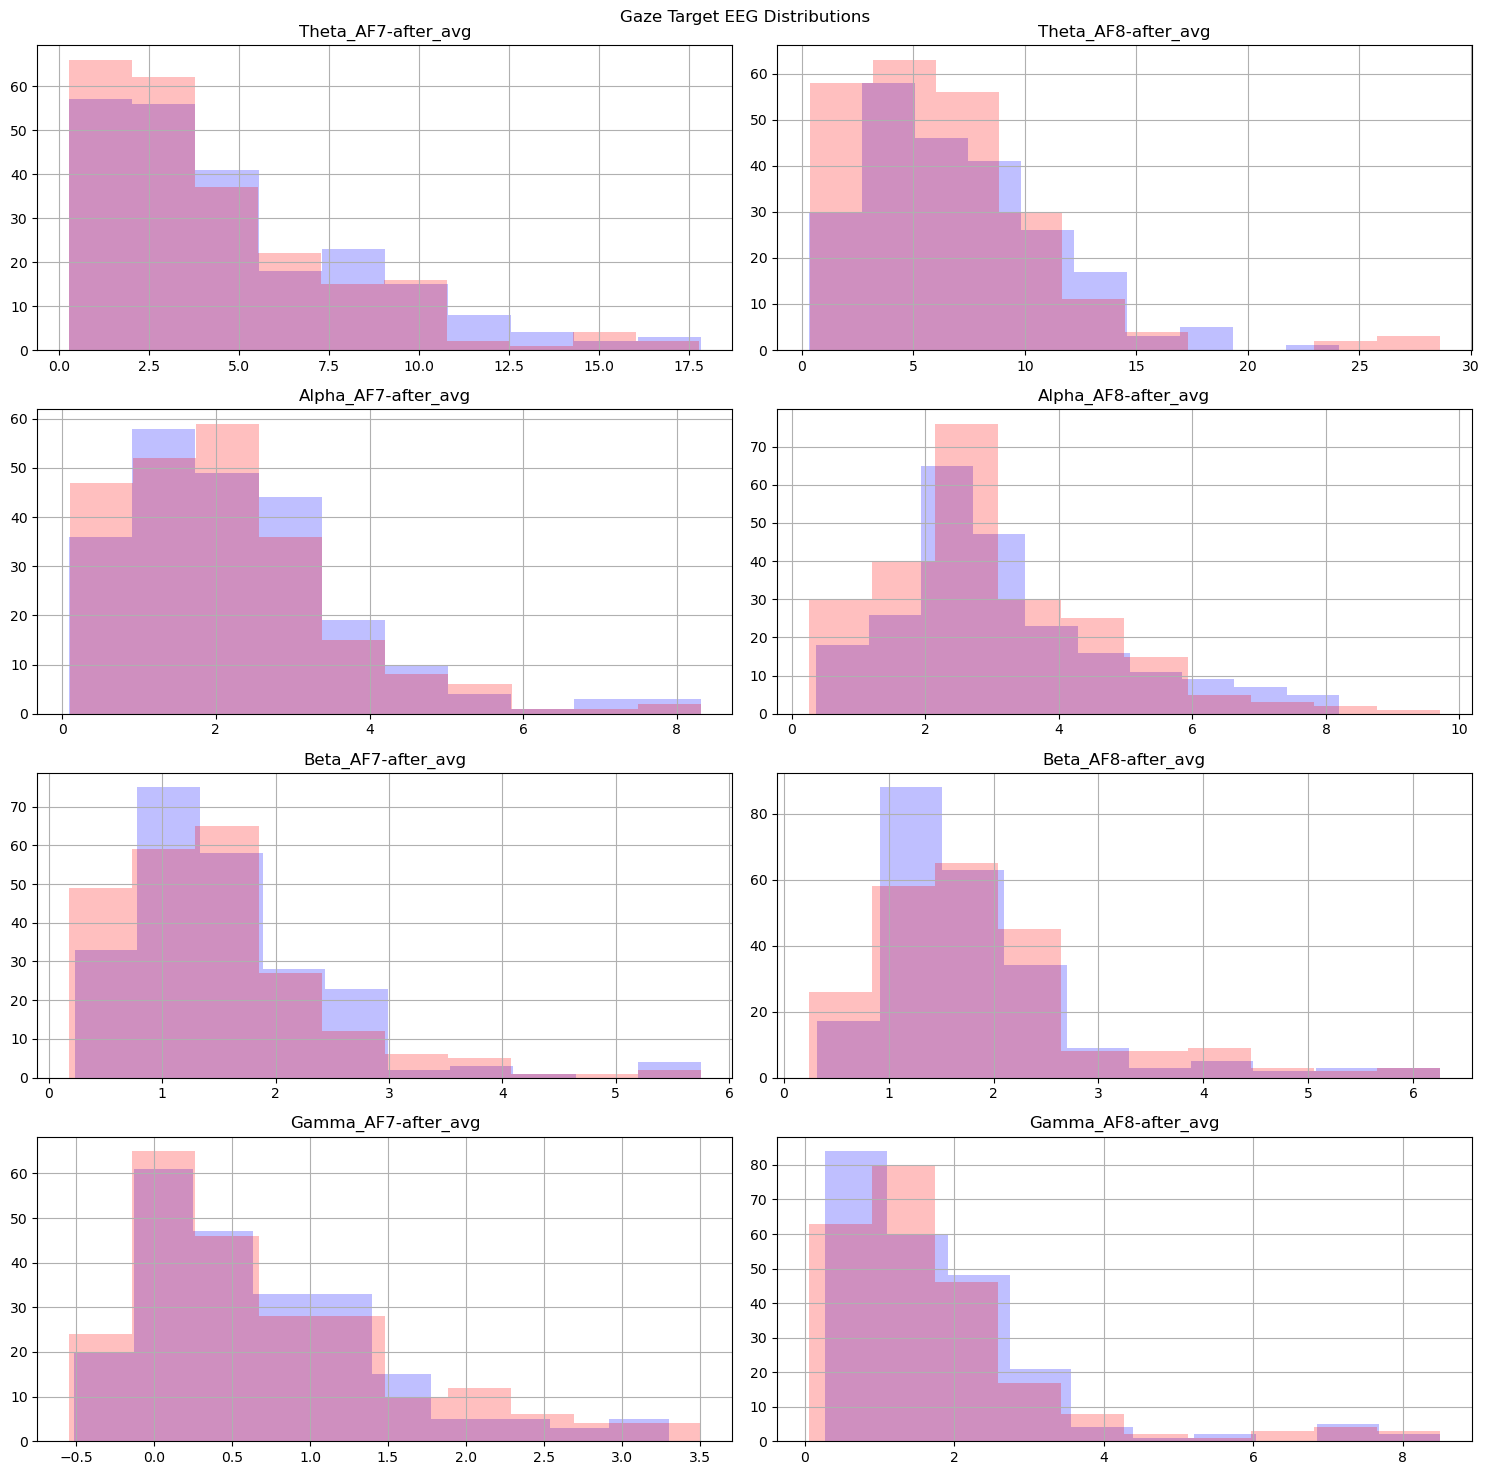

In [27]:
iDisplay(Markdown('### _Example:_'))

TestNormality_Shapiro(
    gaze_eeg_df, 
    _FREQUENCY_BANDS, 
    _ELECTRODES, 
    display_distributions=True, 
    save_figname=os.path.join(_OUTPUT_DIR, 'ex_distributions.png')
)

## 2b. Statistical Tests

_Note that we ultimately went with Spearman Correlation analysis. The only important function we used is `MultipleCorrelations()`. Again, we only include the other statistical tests for sake of documentation._

In [28]:
def OneWayAnova_TargetType(df, eeg_column, verbose:bool=True):
    f_stat, p_value = stats.f_oneway(
        df[df['target_type'] == 'VehicleSignal'][eeg_column],
        df[df['target_type'] == 'PedestrianSignal'][eeg_column],
        df[df['target_type'] == 'SignalPole'][eeg_column],
        df[df['target_type'] == 'Vehicle'][eeg_column],
        df[df['target_type'] == 'Pedestrian'][eeg_column],
        df[df['target_type'] == 'Road'][eeg_column],
        df[df['target_type'] == 'Tree'][eeg_column],
        df[df['target_type'] == 'Sidewalk'][eeg_column]
    )
    if verbose:
        if p_value < 0.05:
            print(f'*{eeg_column}','\t f-statistic:',f_stat,'\t p-value:',p_value)
        else:
            print(f'{eeg_column}','\t f-statistic:',f_stat,'\t p-value:',p_value)

def OneWayAnova_TargetState(df, eeg_column, verbose:bool=True):
    f_stat, p_value = stats.f_oneway(
        df[df['target_state'] == 'Static'][eeg_column],
        df[df['target_state'] == 'Dynamic'][eeg_column]
    )
    if verbose:
        if p_value < 0.05:
            print(f'*{eeg_column}','\t f-statistic:',f_stat,'\t p-value:',p_value)
        else:
            print(f'{eeg_column}','\t f-statistic:',f_stat,'\t p-value:',p_value)

# We assume that the provided categorical column is biserial (aka only contains 'yes'-vs-'no', 0-or-1 values)
def PointsBiserial(df, eeg_column, categorical_column, verbose:bool=True):
    encoding_column = f'{categorical_column}_encoding'
    df[encoding_column] = le.fit_transform(df[categorical_column])
    res = stats.pointbiserialr(df[eeg_column], df[encoding_column])
    if verbose:
        if res.pvalue < 0.05: print(f'*{eeg_column}','\t statistic:',res.statistic,'\t p-value:',res.pvalue)
        else: print(f'{eeg_column}','\t statistic:',res.statistic,'\t p-value:',res.pvalue)
            
# We assume that the provided encoding column is NOT simply split between 0 and 1.
# We separate unique values in the categorical column into separate columns, then perform points biserial on each
def PointsPolyserial(df, eeg_column, categorical_column, verbose:bool=True):
    df_dummies = pd.get_dummies(df[categorical_column])
    df_new = pd.concat([df, df_dummies], axis=1)
    
    output_string = ''
    for dummy_col in df_dummies.columns:
        res = stats.pointbiserialr(df_new[eeg_column], df_new[dummy_col])
        if verbose:
            if res.pvalue < 0.05: output_string += f'|{dummy_col}|{res.statistic}|{res.pvalue}|*|\n'
            else: output_string += f'|{dummy_col}|{res.statistic}|{res.pvalue}||\n'
    iDisplay(Markdown(f'--- **{eeg_column}** ---\n|Target Type|Statistic|PValue|Significant?|\n|:-|:-:|:-:|:-:|\n'+output_string))

def MultipleCorrelations(df, method='kendall', display_df:bool=True):

    def kendall_pval(x,y):
        return kendalltau(x,y)[1]
    def pearsonr_pval(x,y):
        return pearsonr(x,y)[1]
    
    def spearmanr_pval(x,y):
        return spearmanr(x,y)[1]
    
    if method =='pearson': 
        corr_stat = 'pearson'
        corr_pval = pearsonr_pval
    elif method =='spearman': 
        corr_stat = 'spearman'
        corr_pval = spearmanr_pval
    else:
        corr_stat = 'kendall'
        corr_pval = kendall_pval
    
    statistics = df.corr(method=corr_stat, numeric_only=True)
    pvalues = df.corr(method=corr_pval, numeric_only=True)
    
    if display_df:
        display(statistics)
        display(pvalues)
    
    return statistics, pvalues
    

In [29]:
iDisplay(Markdown('### _Example:_'))

freq_band_colnames = []
for freq in _FREQUENCY_BANDS: 
    for electrode in _ELECTRODES:
        freq_band_colnames.append(f'{freq}_{electrode}')

"""
iDisplay(Markdown("**One Way ANOVA: Target Types:**"))
for col in freq_band_colnames:
    OneWayAnova_TargetType(gaze_eeg_df, f'{col}-prior_avg')
    OneWayAnova_TargetType(gaze_eeg_df, f'{col}-after_avg')

iDisplay(Markdown("**One Way ANOVA: Target States:**"))
for col in freq_band_colnames:
    OneWayAnova_TargetState(gaze_eeg_df, f'{col}-prior_avg')
    OneWayAnova_TargetState(gaze_eeg_df, f'{col}-after_avg')

#iDisplay(Markdown("**Points Polyserial: Target Types:**"))
for col in freq_band_colnames:
    PointsPolyserial(gaze_eeg_df, f'{col}-prior_avg', 'target_type')
    PointsPolyserial(gaze_eeg_df, f'{col}-after_avg', 'target_type')
"""

MultipleCorrelations(gaze_eeg_df, method='spearman')

### _Example:_

,start_unix_ms,start_frame,end_unix_ms,end_frame,duration_ms,Theta_AF7-prior_avg,Theta_AF7-prior_max,Theta_AF7-during_avg,Theta_AF7-during_max,Theta_AF7-after_avg,...,Gamma_AF7-during_avg,Gamma_AF7-during_max,Gamma_AF7-after_avg,Gamma_AF7-after_max,Gamma_AF8-prior_avg,Gamma_AF8-prior_max,Gamma_AF8-during_avg,Gamma_AF8-during_max,Gamma_AF8-after_avg,Gamma_AF8-after_max
start_unix_ms,1.000000,1.000000,1.000000,1.000000,0.051175,0.453651,0.494076,0.474290,0.510680,0.442033,...,-0.024595,0.012335,-0.048064,-0.030485,-0.224396,-0.263484,-0.264892,-0.302742,-0.298885,-0.348875
start_frame,1.000000,1.000000,1.000000,1.000000,0.051175,0.453651,0.494076,0.474290,0.510680,0.442033,...,-0.024595,0.012335,-0.048064,-0.030485,-0.224396,-0.263484,-0.264892,-0.302742,-0.298885,-0.348875
end_unix_ms,1.000000,1.000000,1.000000,1.000000,0.051175,0.453651,0.494076,0.474290,0.510680,0.442033,...,-0.024595,0.012335,-0.048064,-0.030485,-0.224396,-0.263484,-0.264892,-0.302742,-0.298885,-0.348875
end_frame,1.000000,1.000000,1.000000,1.000000,0.051175,0.453651,0.494076,0.474290,0.510680,0.442033,...,-0.024595,0.012335,-0.048064,-0.030485,-0.224396,-0.263484,-0.264892,-0.302742,-0.298885,-0.348875
duration_ms,0.051175,0.051175,0.051175,0.051175,1.000000,-0.011064,-0.034653,-0.131785,-0.110300,-0.153419,...,-0.045638,-0.084216,-0.029594,-0.019836,-0.141059,-0.113604,-0.063507,-0.052634,0.024111,0.038062
Theta_AF7-prior_avg,0.453651,0.453651,0.453651,0.453651,-0.011064,1.000000,0.955759,0.760196,0.760953,0.392908,...,0.106560,0.122377,0.029913,0.062669,-0.156028,-0.178007,-0.212135,-0.215809,-0.279989,-0.270685
Theta_AF7-prior_max,0.494076,0.494076,0.494076,0.494076,-0.034653,0.955759,1.000000,0.775982,0.775805,0.453630,...,0.140306,0.153412,0.076571,0.105027,-0.144219,-0.169853,-0.220828,-0.221526,-0.274031,-0.259843
Theta_AF7-during_avg,0.474290,0.474290,0.474290,0.474290,-0.131785,0.760196,0.775982,1.000000,0.960077,0.750780,...,0.232351,0.237729,0.156393,0.167735,-0.055154,-0.080278,-0.102888,-0.102473,-0.196144,-0.212602
Theta_AF7-during_max,0.510680,0.510680,0.510680,0.510680,-0.110300,0.760953,0.775805,0.960077,1.000000,0.725821,...,0.208878,0.231399,0.183917,0.187678,-0.080258,-0.112633,-0.144279,-0.149573,-0.218305,-0.241199
Theta_AF7-after_avg,0.442033,0.442033,0.442033,0.442033,-0.153419,0.392908,0.453630,0.750780,0.725821,1.000000,...,0.231748,0.252410,0.275292,0.273363,0.012606,-0.006598,0.040772,0.024844,-0.012193,-0.029862


,start_unix_ms,start_frame,end_unix_ms,end_frame,duration_ms,Theta_AF7-prior_avg,Theta_AF7-prior_max,Theta_AF7-during_avg,Theta_AF7-during_max,Theta_AF7-after_avg,...,Gamma_AF7-during_avg,Gamma_AF7-during_max,Gamma_AF7-after_avg,Gamma_AF7-after_max,Gamma_AF8-prior_avg,Gamma_AF8-prior_max,Gamma_AF8-during_avg,Gamma_AF8-during_max,Gamma_AF8-after_avg,Gamma_AF8-after_max
start_unix_ms,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.442920,6.363451e-13,2.250935e-15,3.913092e-14,1.770439e-16,2.821722e-12,...,7.124518e-01,8.533692e-01,4.711725e-01,6.477575e-01,6.598590e-04,5.841402e-05,5.313430e-05,3.391326e-06,4.572634e-06,6.743891e-08
start_frame,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.442920,6.363451e-13,2.250935e-15,3.913092e-14,1.770439e-16,2.821722e-12,...,7.124518e-01,8.533692e-01,4.711725e-01,6.477575e-01,6.598590e-04,5.841402e-05,5.313430e-05,3.391326e-06,4.572634e-06,6.743891e-08
end_unix_ms,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.442920,6.363451e-13,2.250935e-15,3.913092e-14,1.770439e-16,2.821722e-12,...,7.124518e-01,8.533692e-01,4.711725e-01,6.477575e-01,6.598590e-04,5.841402e-05,5.313430e-05,3.391326e-06,4.572634e-06,6.743891e-08
end_frame,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.442920,6.363451e-13,2.250935e-15,3.913092e-14,1.770439e-16,2.821722e-12,...,7.124518e-01,8.533692e-01,4.711725e-01,6.477575e-01,6.598590e-04,5.841402e-05,5.313430e-05,3.391326e-06,4.572634e-06,6.743891e-08
duration_ms,4.429200e-01,4.429200e-01,4.429200e-01,4.429200e-01,1.000000,8.683315e-01,6.035008e-01,4.734118e-02,9.737255e-02,2.075400e-02,...,4.938691e-01,2.061997e-01,6.573962e-01,7.662802e-01,3.365618e-02,8.769235e-02,3.408423e-01,4.300060e-01,7.178680e-01,5.683364e-01
Theta_AF7-prior_avg,6.363451e-13,6.363451e-13,6.363451e-13,6.363451e-13,0.868332,1.000000e+00,1.488742e-121,5.041044e-44,3.703291e-44,8.483496e-10,...,1.093343e-01,6.568836e-02,6.539431e-01,3.472641e-01,1.866076e-02,7.174398e-03,1.303723e-03,1.067175e-03,1.859668e-05,3.577720e-05
Theta_AF7-prior_max,2.250935e-15,2.250935e-15,2.250935e-15,2.250935e-15,0.603501,1.488742e-121,1.000000e+00,6.351915e-47,6.866248e-47,6.381332e-13,...,3.462515e-02,2.075949e-02,2.505629e-01,1.145599e-01,2.983668e-02,1.035878e-02,8.075207e-04,7.764534e-04,2.835184e-05,7.445832e-05
Theta_AF7-during_avg,3.913092e-14,3.913092e-14,3.913092e-14,3.913092e-14,0.047341,5.041044e-44,6.351915e-47,1.000000e+00,1.823908e-126,2.126118e-42,...,4.158231e-04,3.016035e-04,1.838270e-02,1.136766e-02,4.082219e-01,2.282863e-01,1.221729e-01,1.236970e-01,2.999587e-03,1.271215e-03
Theta_AF7-during_max,1.770439e-16,1.770439e-16,1.770439e-16,1.770439e-16,0.097373,3.703291e-44,6.866248e-47,1.823908e-126,1.000000e+00,2.012104e-38,...,1.552553e-03,4.398134e-04,5.445206e-03,4.549641e-03,2.284078e-01,9.045340e-02,2.976779e-02,2.420899e-02,9.297433e-04,2.441994e-04
Theta_AF7-after_avg,2.821722e-12,2.821722e-12,2.821722e-12,2.821722e-12,0.020754,8.483496e-10,6.381332e-13,2.126118e-42,2.012104e-38,1.000000e+00,...,4.308798e-04,1.208571e-04,2.595279e-05,2.970747e-05,8.501777e-01,9.212501e-01,5.411004e-01,7.096696e-01,8.550306e-01,6.544908e-01


(                      start_unix_ms  start_frame  end_unix_ms  end_frame  \
 start_unix_ms              1.000000     1.000000     1.000000   1.000000   
 start_frame                1.000000     1.000000     1.000000   1.000000   
 end_unix_ms                1.000000     1.000000     1.000000   1.000000   
 end_frame                  1.000000     1.000000     1.000000   1.000000   
 duration_ms                0.051175     0.051175     0.051175   0.051175   
 Theta_AF7-prior_avg        0.453651     0.453651     0.453651   0.453651   
 Theta_AF7-prior_max        0.494076     0.494076     0.494076   0.494076   
 Theta_AF7-during_avg       0.474290     0.474290     0.474290   0.474290   
 Theta_AF7-during_max       0.510680     0.510680     0.510680   0.510680   
 Theta_AF7-after_avg        0.442033     0.442033     0.442033   0.442033   
 Theta_AF7-after_max        0.471714     0.471714     0.471714   0.471714   
 Theta_AF8-prior_avg        0.477153     0.477153     0.477153   0.477153   

## 2c. Combined Example

# 3. Aggregate Participant Parsing

## 3a. Normality + Points Biserial Example 

Theta_AF7: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=44.10607745910288, pvalue=2.645373328627566e-10)
	*AFTER: NormaltestResult(statistic=64.65599936199486, pvalue=9.122799447189337e-15)
Theta_AF8: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=21.412984037039884, pvalue=2.2399049825219834e-05)
	*AFTER: NormaltestResult(statistic=104.96867958367542, pvalue=1.6082029042404295e-23)
Alpha_AF7: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=70.69460481205985, pvalue=4.455142655625286e-16)
	*AFTER: NormaltestResult(statistic=66.88156173727893, pvalue=2.998150283285822e-15)
Alpha_AF8: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=32.63935796463349, pvalue=8.17435456714804e-08)
	*AFTER: NormaltestResult(statistic=45.23185729394374, pvalue=1.5067006842581355e-10)
Beta_AF7: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=109.19237782025431, pvalue=1.9461505055019084e-24)
	*AFTER: NormaltestResult(statistic=86.27428706958328, pvalue=1.8440665824377996e-19)

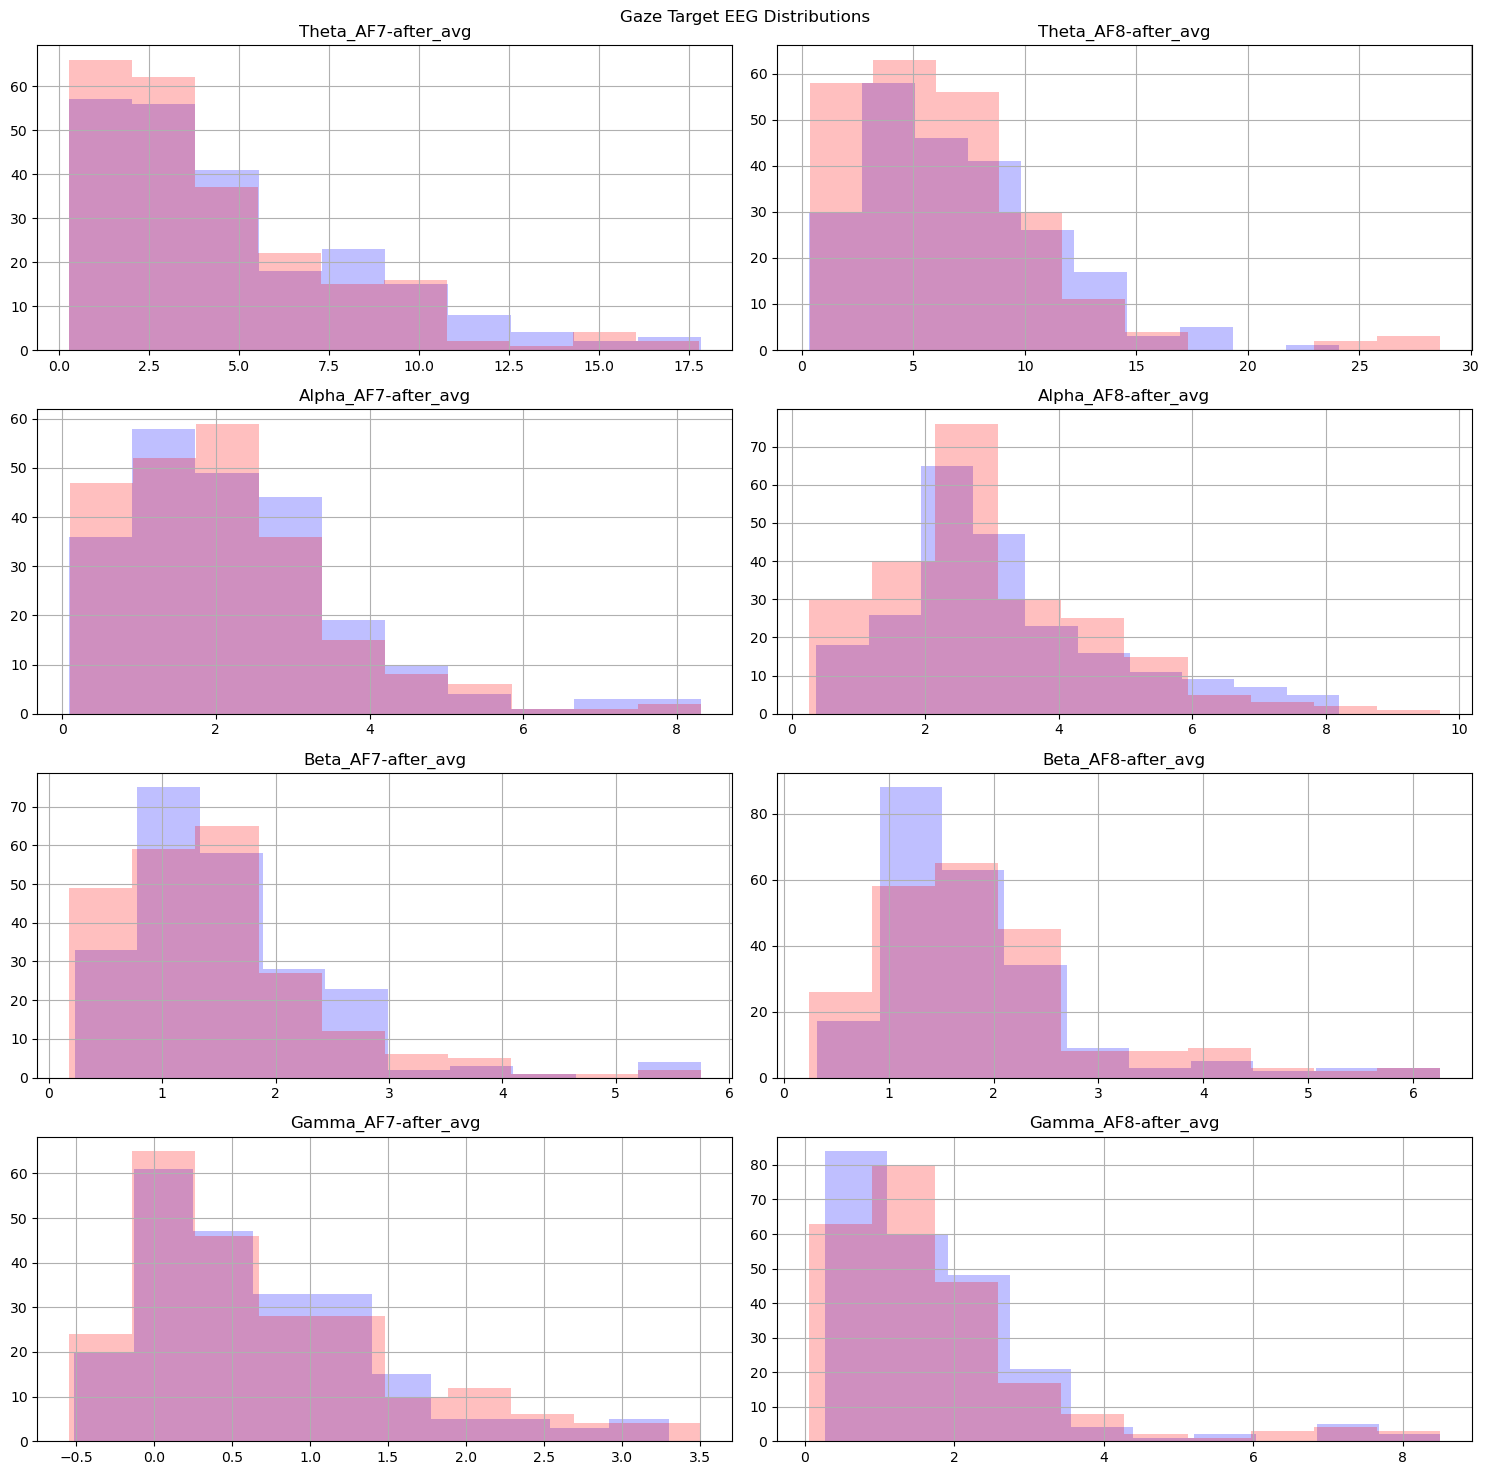

**Points Bilateral: Target Types:**

--- **Theta_AF7-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.14166239645341475|0.03289629801462117|*|
|PedestrianSignal|-0.1297478343724508|0.05090062745194094||
|Vehicle|0.04505526140522897|0.4994079953259564||
|VehicleSignal|-0.09582835403996329|0.1501099756489336||


--- **Theta_AF7-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.2212950172816249|0.0007866140367801441|*|
|PedestrianSignal|0.022301720280669145|0.7382317433396124||
|Vehicle|-0.14288604562851528|0.0314001374618826|*|
|VehicleSignal|-0.010370726347487818|0.8765120334890375||


--- **Theta_AF8-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.19686215268778853|0.002893245592847854|*|
|PedestrianSignal|-0.09878992198383163|0.13785261675751898||
|Vehicle|-0.030194921955965792|0.6508914830986061||
|VehicleSignal|-0.06160103057403847|0.3555555181559159||


--- **Theta_AF8-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.14570053248652362|0.02817748143660043|*|
|PedestrianSignal|-0.023793104999310533|0.7214281650698925||
|Vehicle|-0.017603404597854366|0.7919507665557425||
|VehicleSignal|-0.0849486698125761|0.20226636456060412||


--- **Alpha_AF7-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.027630245382303402|0.6788210047325535||
|PedestrianSignal|-0.16287755425546063|0.014014992363326827|*|
|Vehicle|0.07060915842438868|0.2894704886673595||
|VehicleSignal|-0.0107903162801945|0.8715580801469284||


--- **Alpha_AF7-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.1786923963553861|0.0069512989897714|*|
|PedestrianSignal|0.16116427096223745|0.015070089980596167|*|
|Vehicle|-0.20887853811101215|0.0015525335788932812|*|
|VehicleSignal|0.022997013621232354|0.7303817803330864||


--- **Alpha_AF8-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.02964254418699824|0.6568675975832448||
|PedestrianSignal|-0.10294697465096507|0.12195929259124623||
|Vehicle|0.024026140050813077|0.7188143223057897||
|VehicleSignal|0.01071924735865778|0.8723968198375986||


--- **Alpha_AF8-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.057465163541465046|0.3888346822729598||
|PedestrianSignal|-0.016504155428114|0.8046727590352557||
|Vehicle|0.013090874243992067|0.8444900526353939||
|VehicleSignal|-0.05594505077005471|0.4015248007277609||


--- **Beta_AF7-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.04259960816658479|0.52309977688972||
|PedestrianSignal|-0.09886311410855726|0.13755969721561603||
|Vehicle|0.0416985787267327|0.5319342790818732||
|VehicleSignal|-0.027085136638237174|0.6848158069302982||


--- **Beta_AF7-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.060852691905299815|0.36144094091798146||
|PedestrianSignal|0.028034683949020048|0.6743861957631316||
|Vehicle|-0.10528925065343364|0.11365294557005923||
|VehicleSignal|0.07211240002832858|0.27929964177212935||


--- **Beta_AF8-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.019470631660124756|0.7704679810136648||
|PedestrianSignal|-0.07693672361839414|0.24830289900957503||
|Vehicle|0.03155610112267011|0.6362604889479206||
|VehicleSignal|-0.008153000932792722|0.9027713245435912||


--- **Beta_AF8-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|-0.03296192785113291|0.6212961956658116||
|PedestrianSignal|-0.011439658618835264|0.8639014433623139||
|Vehicle|-0.07345873838372015|0.27039768443068146||
|VehicleSignal|0.1355587838071143|0.04129534375489665|*|


--- **Gamma_AF7-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|-0.0004662214542632898|0.994426377908102||
|PedestrianSignal|-0.0037462428245022194|0.95523710039854||
|Vehicle|0.017269756211205554|0.795806550013231||
|VehicleSignal|-0.02054160741936968|0.7582235410969379||


--- **Gamma_AF7-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|-0.11493709852439168|0.08401104418402934||
|PedestrianSignal|0.020240675904342822|0.7616581505402736||
|Vehicle|-0.05352486791603296|0.4222308626794715||
|VehicleSignal|0.1575306575905535|0.01754015584878676|*|


--- **Gamma_AF8-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|-0.06606727397302267|0.3216895958034466||
|PedestrianSignal|-0.046132846217149984|0.48919322521588665||
|Vehicle|0.07798935823112076|0.24187033201661073||
|VehicleSignal|-0.018515050680193046|0.7814413982460064||


--- **Gamma_AF8-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|-0.06849603388739357|0.30418186775937606||
|PedestrianSignal|-0.0565124132231279|0.39675976416967634||
|Vehicle|-0.03800871231773548|0.5688788289938811||
|VehicleSignal|0.1479396710949342|0.02581991550388878|*|


In [30]:
TestNormality_Omni(gaze_eeg_df, _FREQUENCY_BANDS, _ELECTRODES, 
              display_distributions=True, save_figname=os.path.join(_OUTPUT_DIR, 'ex2_distributions.png'))

freq_band_colnames = []
for freq in _FREQUENCY_BANDS: 
    for electrode in _ELECTRODES:
        freq_band_colnames.append(f'{freq}_{electrode}')
    
"""
iDisplay(Markdown("**One Way ANOVA: Target Types:**"))
for col in freq_band_colnames:
    OneWayAnova_TargetType(gaze_eeg_df, f'{col}-prior_avg')
    OneWayAnova_TargetType(gaze_eeg_df, f'{col}-after_avg')
iDisplay(Markdown("**One Way ANOVA: Target States:**"))
for col in freq_band_colnames:
    OneWayAnova_TargetState(gaze_eeg_df, f'{col}-prior_avg')
    OneWayAnova_TargetState(gaze_eeg_df, f'{col}-after_avg')
"""

iDisplay(Markdown("**Points Bilateral: Target Types:**"))
for col in freq_band_colnames:
    PointsPolyserial(gaze_eeg_df, f'{col}-prior_avg', 'target_type')
    PointsPolyserial(gaze_eeg_df, f'{col}-after_avg', 'target_type')


## 3b. Processing all Participants

In [31]:
freq_band_colnames = []
for freq in _FREQUENCY_BANDS: 
    for electrode in _ELECTRODES:
        freq_band_colnames.append(f'{freq}_{electrode}')
        
def ProcessParticipant(pdir:str, calculate_results:bool=True):
    
    iDisplay(Markdown(f'## Processing {pdir}'))
    
    # Step 1: Read more about the Trial
    trial_data = GetTrial(
        os.path.join(pdir,'trials.csv'), 
        verbose=True )
        
    # Step 2: Learn from Resting
    rest_df = GetRest(
        os.path.join(pdir, 'eeg_rest.csv') )
    
    # Step 3: Read Positions, get Crossings 
    positions_df = GetPositions(
        os.path.join(pdir, 'positions.csv'), 
        minUnix=trial_data['initial_end_unix_ms'], 
        maxUnix=trial_data['session_end_unix_ms'] )
    player_df = GetPlayerPositions(
        positions_df )
    crossings_df = GetCrossings(
        player_df )

    # Step 4: Read the Eyes, find the Gaze
    eyes_df = GetEyes(
        os.path.join(pdir, 'eye.csv'), 
        trial_data['initial_end_unix_ms'], 
        trial_data['session_end_unix_ms'],
        obj_blacklist=_OBJECT_BLACKLIST
    )
    gaze_df = GetGazeFromEyes(
        eyes_df )

    # Step 5: Brain Wave EEG from Sessions
    eeg_df = GetSessionEEG(
        os.path.join(pdir, 'eeg_vr.csv'), 
        trial_data['initial_end_unix_ms'], 
        trial_data['session_end_unix_ms'] )
    eeg_df = NormalizeEEG(
        eeg_df, 
        rest_df, 
        _FREQUENCY_BANDS, 
        _ELECTRODES )
    gaze_eeg_df = CombineGazeEEG(
        gaze_df, 
        eeg_df, 
        _FREQUENCY_BANDS, 
        _ELECTRODES )
    
    if calculate_results:
        # Step 6: Normality Assumption
        TestNormality_Omni(
            gaze_eeg_df, 
            _FREQUENCY_BANDS, 
            _ELECTRODES, 
            display_distributions=True, 
            save_figname=os.path.join(pdir, 'distributions.png') )

        # Step 7: Statistical Tests
        
        iDisplay(Markdown("**One Way ANOVA: Target Types:**"))
        for col in freq_band_colnames:
            OneWayAnova_TargetType(gaze_eeg_df, f'{col}-prior_avg')
            OneWayAnova_TargetType(gaze_eeg_df, f'{col}-after_avg')
        
        """
        iDisplay(Markdown("**One Way ANOVA: Target States:**"))
        for col in freq_band_colnames:
            OneWayAnova_TargetState(gaze_eeg_df, f'{col}-prior_avg')
            OneWayAnova_TargetState(gaze_eeg_df, f'{col}-after_avg')
        iDisplay(Markdown("**Points Polyserial: Target Types:**"))
        for col in freq_band_colnames:
            PointsPolyserial(gaze_eeg_df, f'{col}-prior_avg', 'target_type')
            PointsPolyserial(gaze_eeg_df, f'{col}-after_avg', 'target_type')
        """
        
    iDisplay(Markdown('---'))
    return {'trial':trial_data['df'], 'eeg':eeg_df, 'gaze':gaze_df, 'eyes':eyes_df, 'gaze_eeg':gaze_eeg_df, 'positions':positions_df, 'player':player_df, 'crossings':crossings_df}


## Processing ./data/P1

Initial End Frame: 939
Initial End Timestamp: 20.01333
Initial End Unix MS: 1742844921602
Session End Unix MS: 1742845089786
Theta_AF7: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=42.67132841027308, pvalue=5.420492751087323e-10)
	*AFTER: NormaltestResult(statistic=58.15958931578977, pvalue=2.3485815520046726e-13)
Theta_AF8: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=21.77248338722468, pvalue=1.8713943062708195e-05)
	*AFTER: NormaltestResult(statistic=94.1035093498657, pvalue=3.678600121127277e-21)
Alpha_AF7: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=59.54545260117916, pvalue=1.1745439074081041e-13)
	*AFTER: NormaltestResult(statistic=65.32682278441364, pvalue=6.523199671367816e-15)
Alpha_AF8: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=33.764657971106885, pvalue=4.6569082319188396e-08)
	*AFTER: NormaltestResult(statistic=42.24999638385591, pvalue=6.691598190173472e-10)
Beta_AF7: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=99.51676358

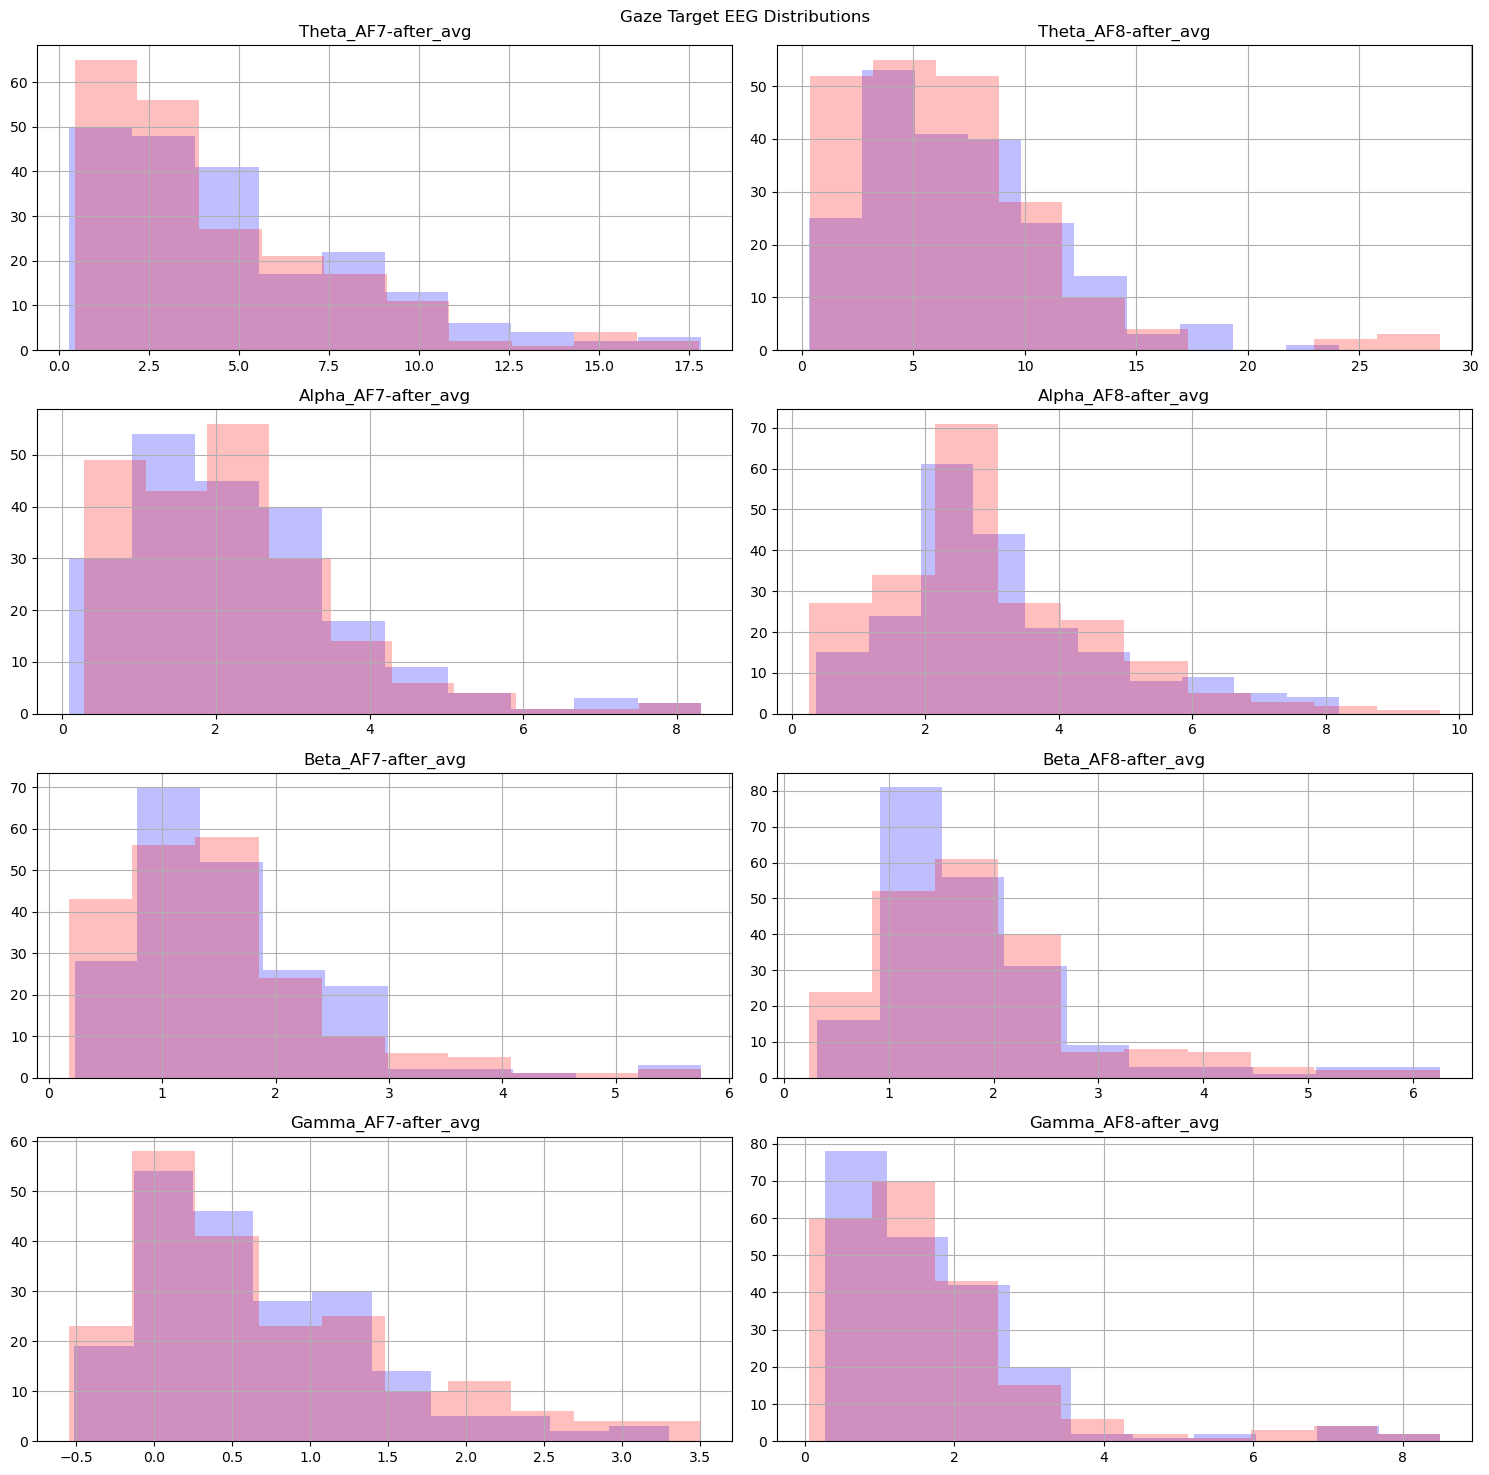

**One Way ANOVA: Target Types:**

Theta_AF7-prior_avg 	 f-statistic: nan 	 p-value: nan
Theta_AF7-after_avg 	 f-statistic: nan 	 p-value: nan
Theta_AF8-prior_avg 	 f-statistic: nan 	 p-value: nan
Theta_AF8-after_avg 	 f-statistic: nan 	 p-value: nan
Alpha_AF7-prior_avg 	 f-statistic: nan 	 p-value: nan
Alpha_AF7-after_avg 	 f-statistic: nan 	 p-value: nan
Alpha_AF8-prior_avg 	 f-statistic: nan 	 p-value: nan
Alpha_AF8-after_avg 	 f-statistic: nan 	 p-value: nan
Beta_AF7-prior_avg 	 f-statistic: nan 	 p-value: nan
Beta_AF7-after_avg 	 f-statistic: nan 	 p-value: nan
Beta_AF8-prior_avg 	 f-statistic: nan 	 p-value: nan
Beta_AF8-after_avg 	 f-statistic: nan 	 p-value: nan
Gamma_AF7-prior_avg 	 f-statistic: nan 	 p-value: nan
Gamma_AF7-after_avg 	 f-statistic: nan 	 p-value: nan
Gamma_AF8-prior_avg 	 f-statistic: nan 	 p-value: nan
Gamma_AF8-after_avg 	 f-statistic: nan 	 p-value: nan


/Users/ryankim/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


---

## Processing ./data/P3

Initial End Frame: 7537
Initial End Timestamp: 257.1467
Initial End Unix MS: 1742939590456
Session End Unix MS: 1742939915808
Theta_AF7: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=96.96073618468145, pvalue=8.815433159277614e-22)
	*AFTER: NormaltestResult(statistic=51.76563204680939, pvalue=5.7442829608778264e-12)
Theta_AF8: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=111.02098966433564, pvalue=7.800068320403828e-25)
	*AFTER: NormaltestResult(statistic=72.11751800650559, pvalue=2.187156907476054e-16)
Alpha_AF7: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=41.938921482209935, pvalue=7.817698398828931e-10)
	*AFTER: NormaltestResult(statistic=20.668723155067312, pvalue=3.2497039095469555e-05)
Alpha_AF8: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=61.050278903876375, pvalue=5.534780175297136e-14)
	*AFTER: NormaltestResult(statistic=21.740994268397717, pvalue=1.9010917582853564e-05)
Beta_AF7: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=25.202

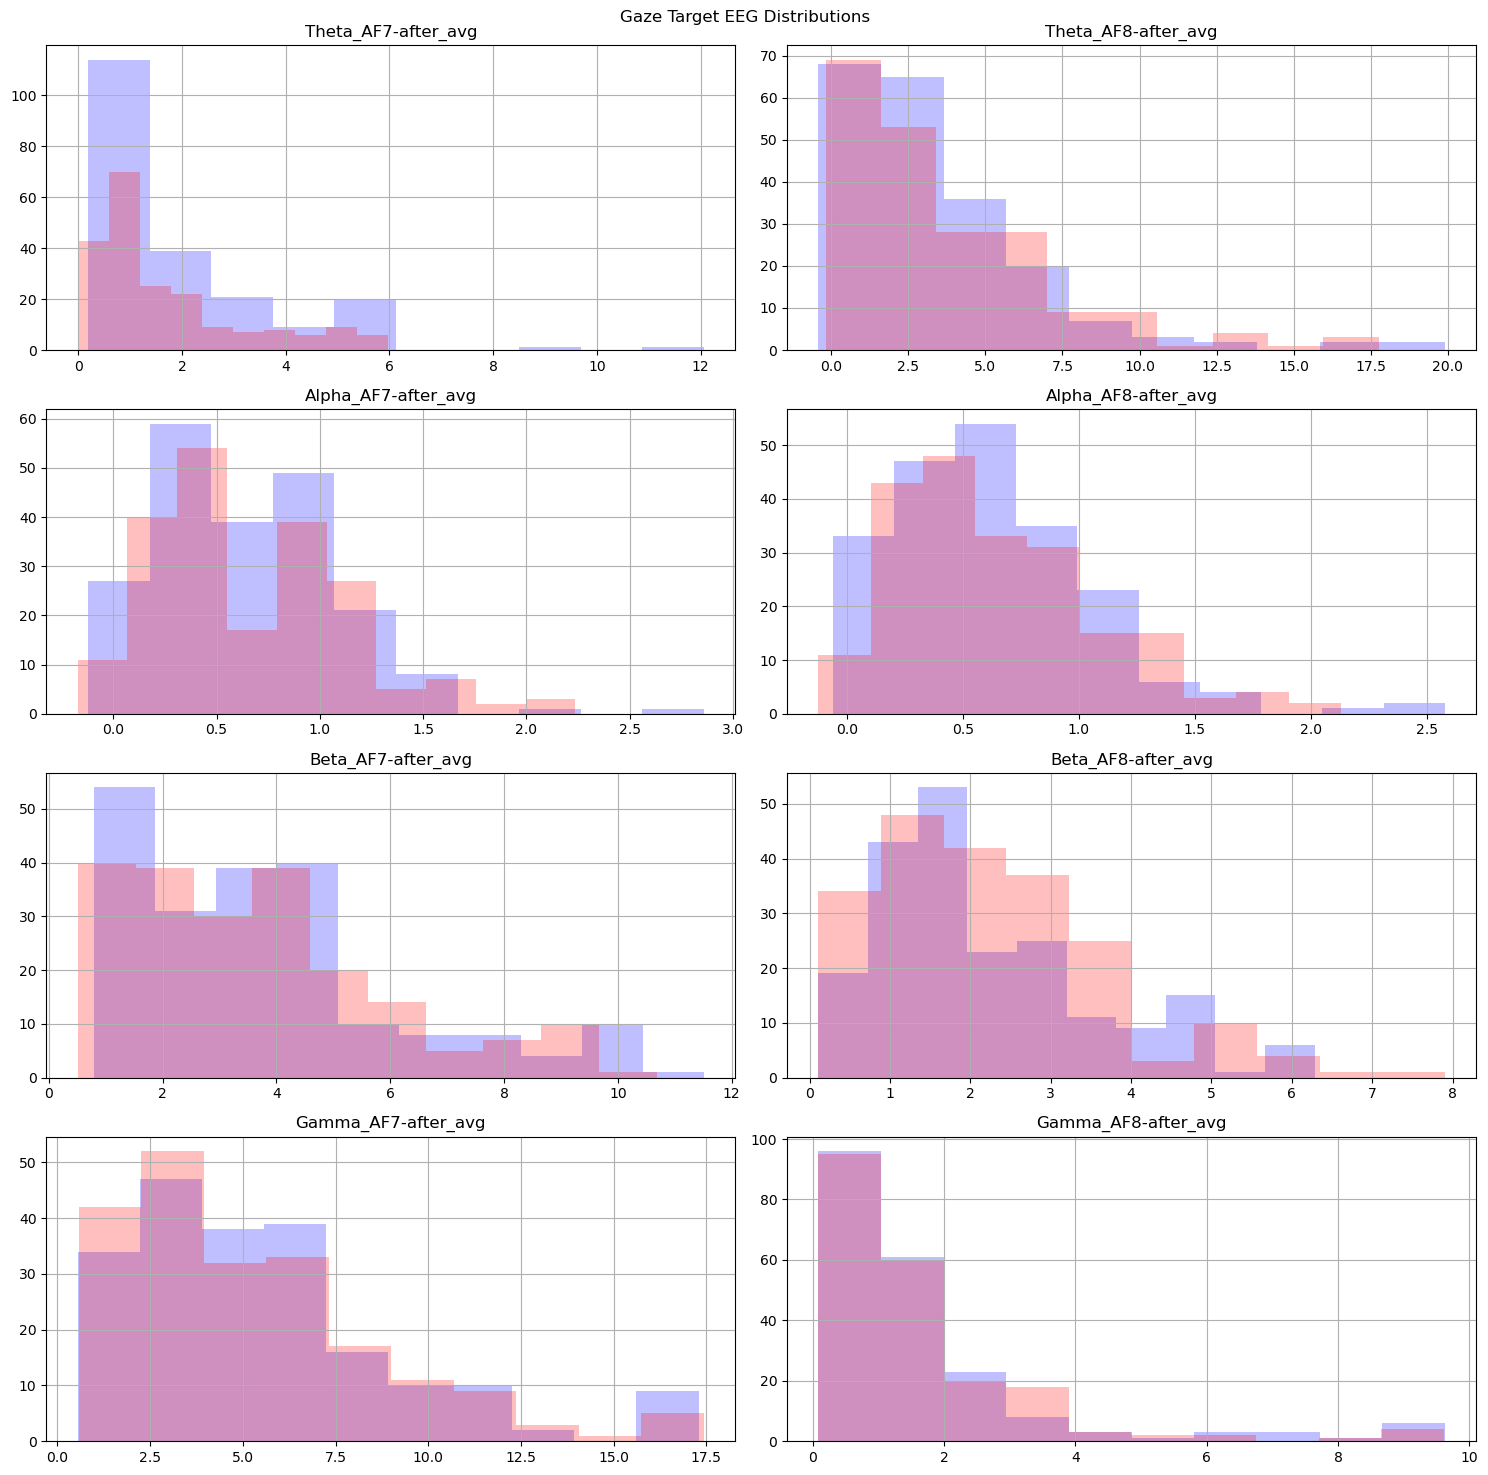

**One Way ANOVA: Target Types:**

Theta_AF7-prior_avg 	 f-statistic: nan 	 p-value: nan
Theta_AF7-after_avg 	 f-statistic: nan 	 p-value: nan
Theta_AF8-prior_avg 	 f-statistic: nan 	 p-value: nan
Theta_AF8-after_avg 	 f-statistic: nan 	 p-value: nan
Alpha_AF7-prior_avg 	 f-statistic: nan 	 p-value: nan
Alpha_AF7-after_avg 	 f-statistic: nan 	 p-value: nan
Alpha_AF8-prior_avg 	 f-statistic: nan 	 p-value: nan
Alpha_AF8-after_avg 	 f-statistic: nan 	 p-value: nan
Beta_AF7-prior_avg 	 f-statistic: nan 	 p-value: nan
Beta_AF7-after_avg 	 f-statistic: nan 	 p-value: nan
Beta_AF8-prior_avg 	 f-statistic: nan 	 p-value: nan
Beta_AF8-after_avg 	 f-statistic: nan 	 p-value: nan
Gamma_AF7-prior_avg 	 f-statistic: nan 	 p-value: nan
Gamma_AF7-after_avg 	 f-statistic: nan 	 p-value: nan
Gamma_AF8-prior_avg 	 f-statistic: nan 	 p-value: nan
Gamma_AF8-after_avg 	 f-statistic: nan 	 p-value: nan


/Users/ryankim/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


---

## Processing ./data/P5

Initial End Frame: 1953
Initial End Timestamp: 54.64
Initial End Unix MS: 1743095004293
Session End Unix MS: 1743095199084
Theta_AF7: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=50.94802449291589, pvalue=8.645239904977798e-12)
	*AFTER: NormaltestResult(statistic=82.59814992784385, pvalue=1.1588831156600462e-18)
Theta_AF8: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=6.469805462533347, pvalue=0.03936403364358769)
	*AFTER: NormaltestResult(statistic=15.845833819765321, pvalue=0.0003623438591349495)
Alpha_AF7: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=116.3030482942969, pvalue=5.560501325734455e-26)
	*AFTER: NormaltestResult(statistic=58.266463990775, pvalue=2.226373911877918e-13)
Alpha_AF8: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=14.136846413321518, pvalue=0.0008515748085834217)
	*AFTER: NormaltestResult(statistic=45.182674177828375, pvalue=1.5442121438429944e-10)
Beta_AF7: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=7.15178958792586

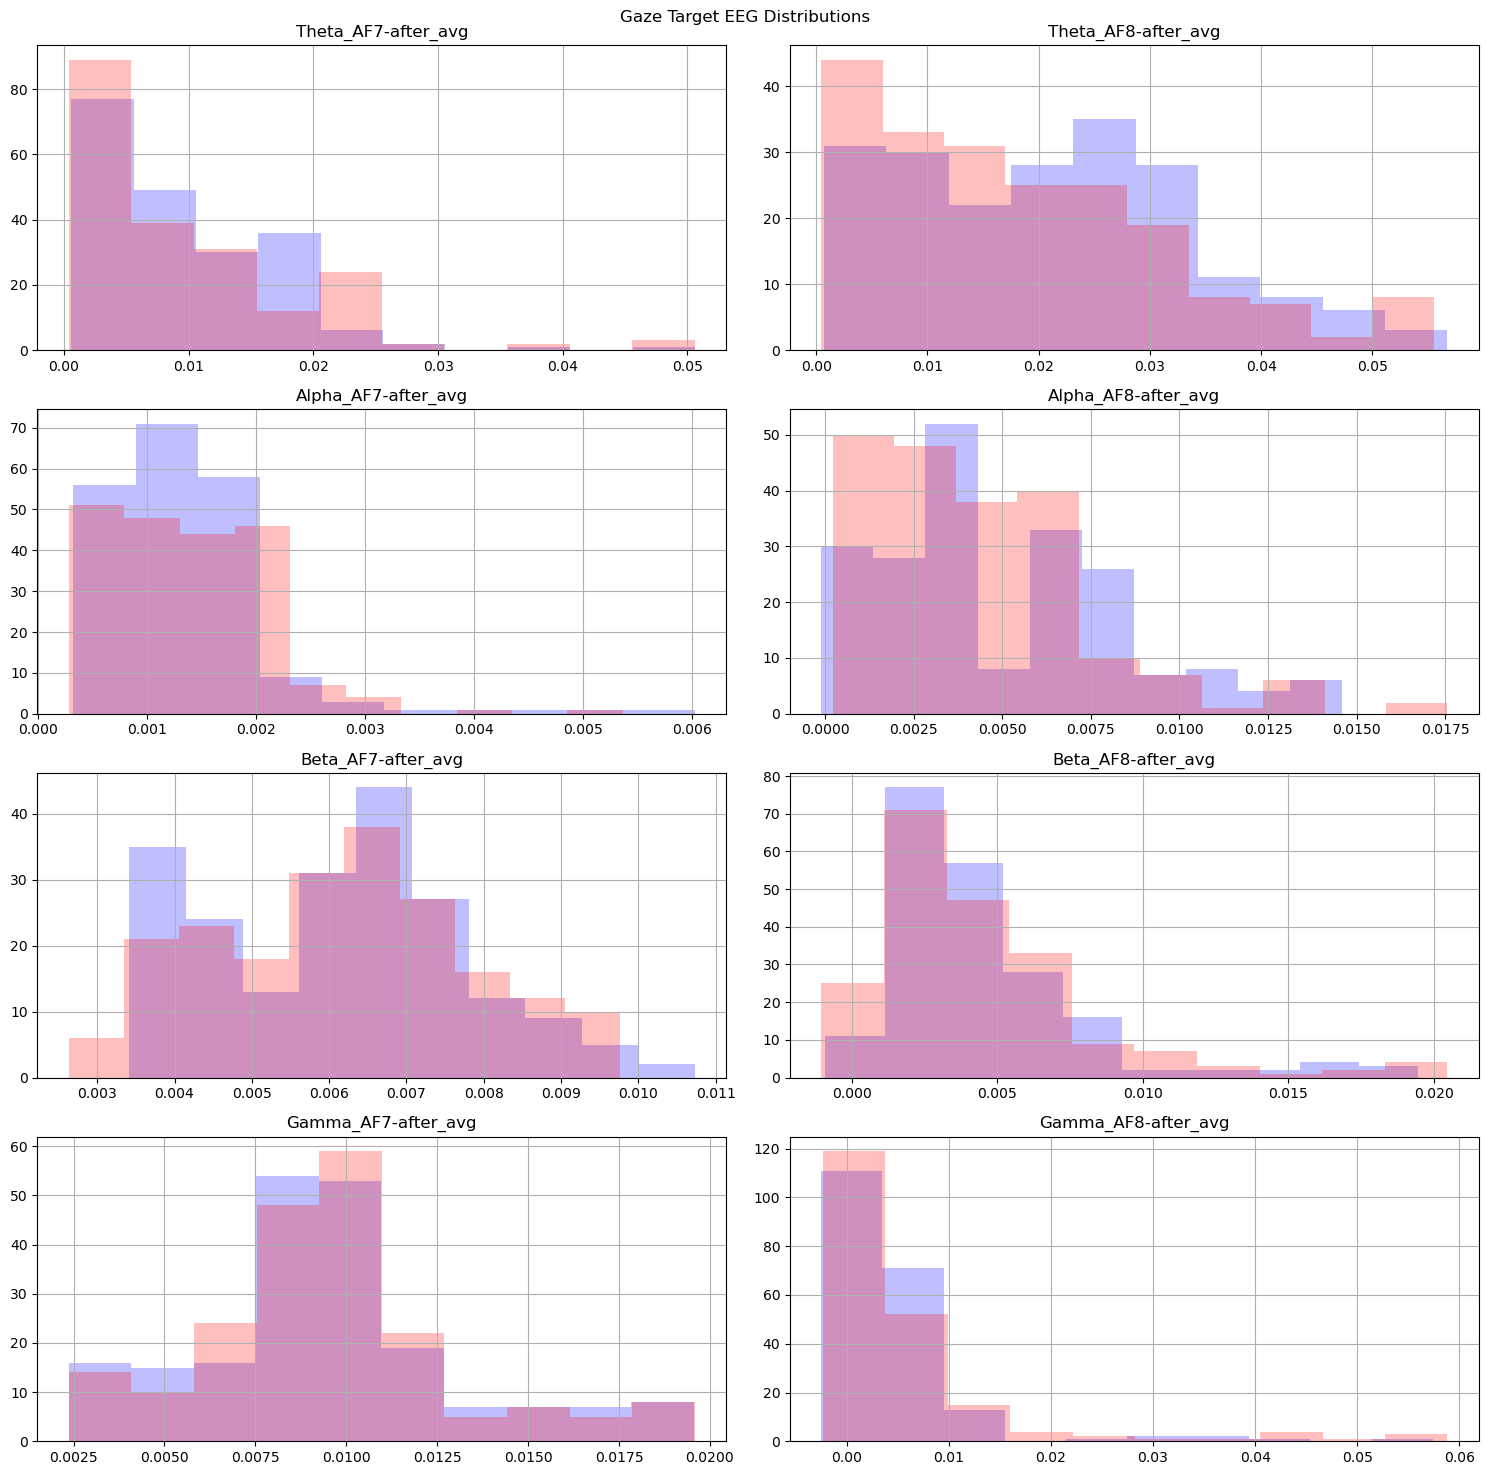

**One Way ANOVA: Target Types:**

Theta_AF7-prior_avg 	 f-statistic: nan 	 p-value: nan
Theta_AF7-after_avg 	 f-statistic: nan 	 p-value: nan
Theta_AF8-prior_avg 	 f-statistic: nan 	 p-value: nan
Theta_AF8-after_avg 	 f-statistic: nan 	 p-value: nan
Alpha_AF7-prior_avg 	 f-statistic: nan 	 p-value: nan
Alpha_AF7-after_avg 	 f-statistic: nan 	 p-value: nan
Alpha_AF8-prior_avg 	 f-statistic: nan 	 p-value: nan
Alpha_AF8-after_avg 	 f-statistic: nan 	 p-value: nan
Beta_AF7-prior_avg 	 f-statistic: nan 	 p-value: nan
Beta_AF7-after_avg 	 f-statistic: nan 	 p-value: nan
Beta_AF8-prior_avg 	 f-statistic: nan 	 p-value: nan
Beta_AF8-after_avg 	 f-statistic: nan 	 p-value: nan
Gamma_AF7-prior_avg 	 f-statistic: nan 	 p-value: nan
Gamma_AF7-after_avg 	 f-statistic: nan 	 p-value: nan
Gamma_AF8-prior_avg 	 f-statistic: nan 	 p-value: nan
Gamma_AF8-after_avg 	 f-statistic: nan 	 p-value: nan


/Users/ryankim/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


---

['Vehicle' 'Pedestrian' 'PedestrianSignal' 'VehicleSignal']


## Aggregate Results

Theta_AF7: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=250.42306266608796, pvalue=4.1814111348243836e-55)
	*AFTER: NormaltestResult(statistic=301.16395391403057, pvalue=4.0093902828439054e-66)
Theta_AF8: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=158.29392010167538, pvalue=4.2355712377464986e-35)
	*AFTER: NormaltestResult(statistic=280.36553189507606, pvalue=1.3164315768809236e-61)
Alpha_AF7: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=275.0715357425815, pvalue=1.857697296931029e-60)
	*AFTER: NormaltestResult(statistic=278.6305792466113, pvalue=3.134284910464843e-61)
Alpha_AF8: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=196.64011731827446, pvalue=1.99591050479448e-43)
	*AFTER: NormaltestResult(statistic=215.10853313210978, pvalue=1.948837039501655e-47)
Beta_AF7: OMNIBUS NORMALITY
	*PRIOR: NormaltestResult(statistic=204.99081647980555, pvalue=3.0676780650348765e-45)
	*AFTER: NormaltestResult(statistic=200.62884653323212, pvalue=2.716436266530283

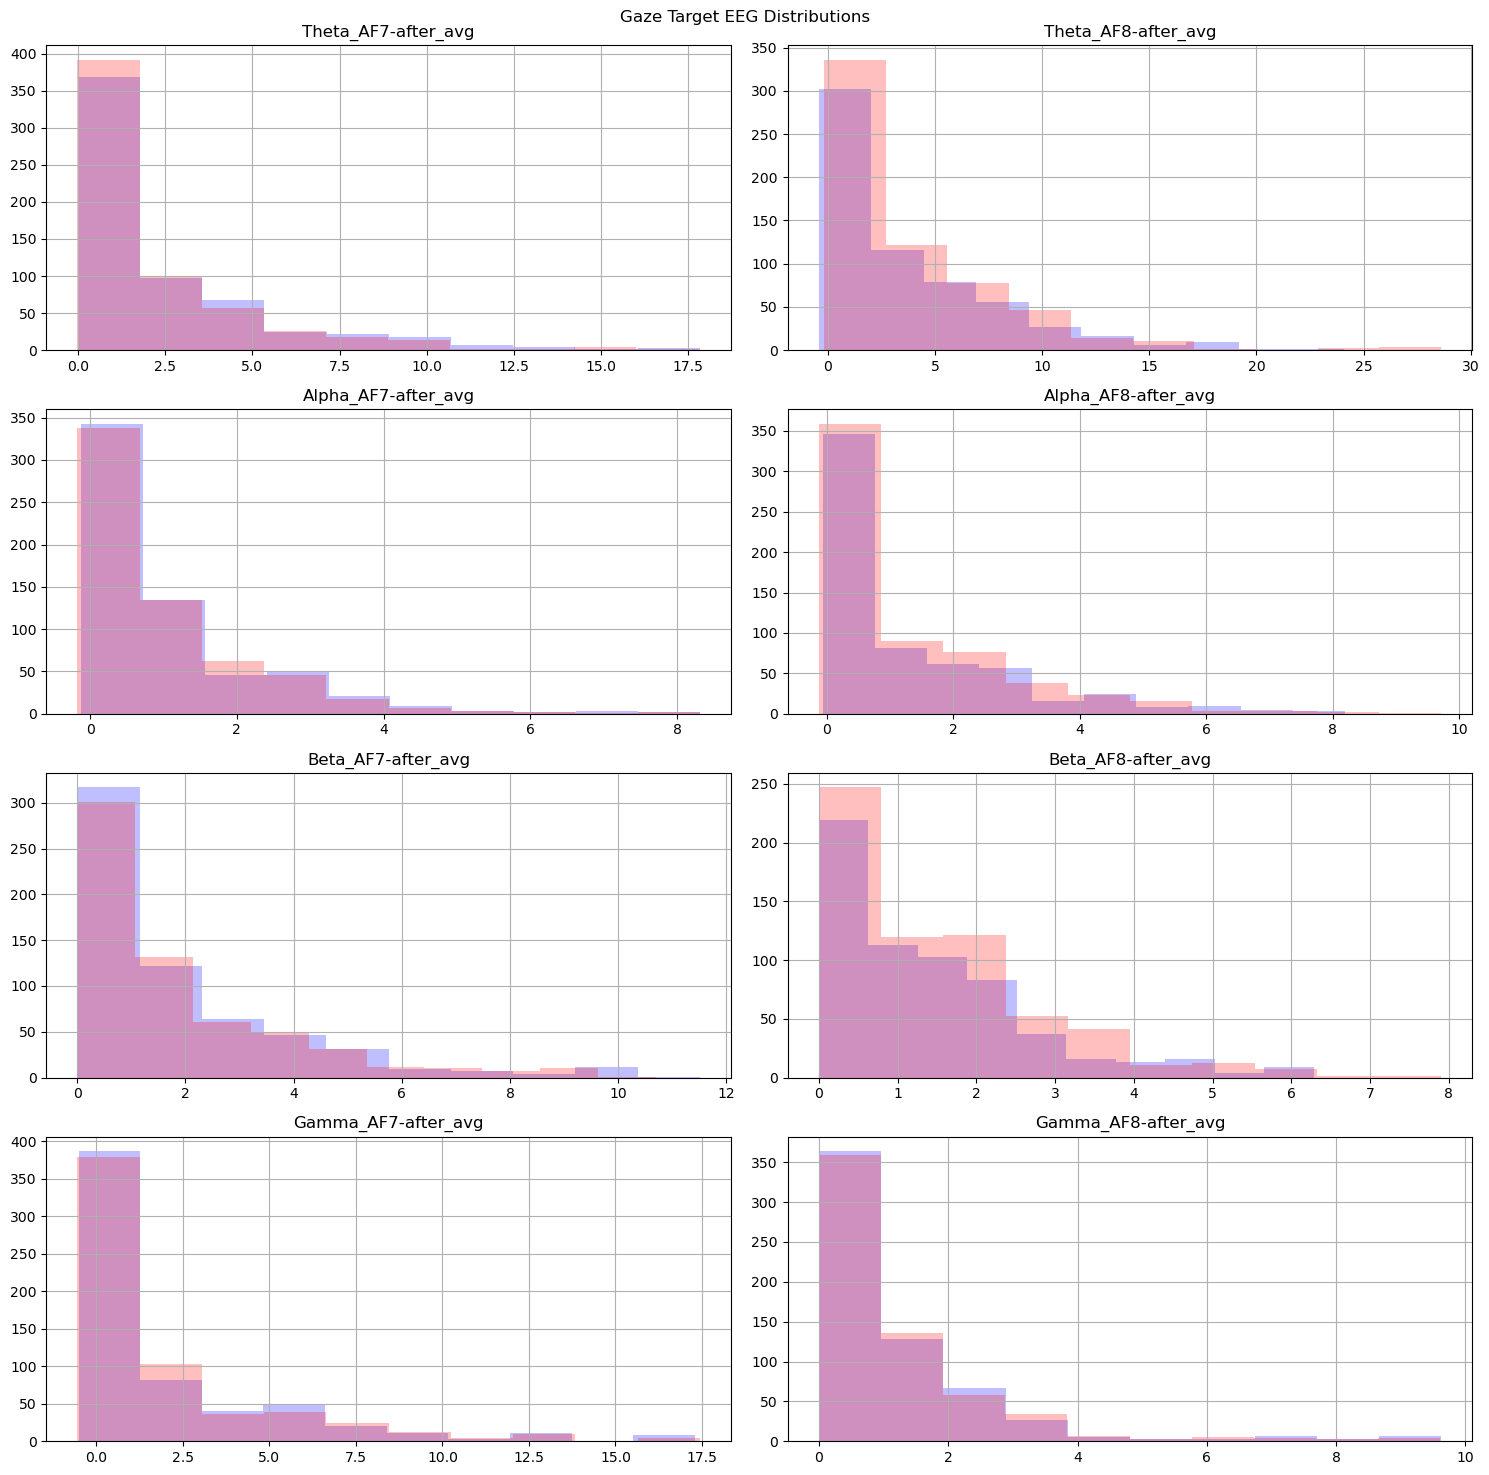

**Points Polyserial: Target Types:**

--- **Theta_AF7-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.05100379585240871|0.20729513641898906||
|PedestrianSignal|-0.13990862821550745|0.00051275047942489|*|
|Vehicle|0.0640578468873016|0.11310541285751281||
|VehicleSignal|-0.002501886993080676|0.9507081854670899||


--- **Theta_AF7-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.07399746657136665|0.06712108179553986||
|PedestrianSignal|-0.06804090708496514|0.09235065523541088||
|Vehicle|-0.022209488673002615|0.583124550731516||
|VehicleSignal|0.03562826086333507|0.37853791399666026||


--- **Theta_AF8-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.07697654510524975|0.05680780630695758||
|PedestrianSignal|-0.10476150556825699|0.009441916506453379|*|
|Vehicle|0.011116307971185043|0.7835670267489432||
|VehicleSignal|0.018661692042286633|0.6446989632851391||


--- **Theta_AF8-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.05196088949566548|0.19888548212747872||
|PedestrianSignal|-0.03234830764973631|0.4240115565212546||
|Vehicle|-0.009863335104204608|0.8074537284384021||
|VehicleSignal|-0.0012990426770700689|0.97439457400517||


--- **Alpha_AF7-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|-0.0014372102640153011|0.9716722400313251||
|PedestrianSignal|-0.15504623549676722|0.00011607997685097211|*|
|Vehicle|0.060463478293025175|0.13483141548888133||
|VehicleSignal|0.07345946859796543|0.06913830483935399||


--- **Alpha_AF7-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.05871945757899054|0.14647067316478873||
|PedestrianSignal|-0.07718962364601667|0.05612354724687268||
|Vehicle|-0.03995254908710402|0.3233711316524181||
|VehicleSignal|0.09018684747650657|0.02555449856084363|*|


--- **Alpha_AF8-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.004346591439263064|0.91447371487016||
|PedestrianSignal|-0.14371882350160814|0.0003575327920269431|*|
|Vehicle|0.044138471783683145|0.2752207384620302||
|VehicleSignal|0.08171497921949063|0.043132818449570405|*|


--- **Alpha_AF8-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.0051011638653931215|0.8996987424491238||
|PedestrianSignal|-0.11428085406668215|0.0046117370669454885|*|
|Vehicle|0.0399304976191835|0.3236384827281173||
|VehicleSignal|0.05542266527235472|0.17054539559879142||


--- **Beta_AF7-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|-0.0018391567093951223|0.9637546230198711||
|PedestrianSignal|-0.04391175035170235|0.2776965227968214||
|Vehicle|-0.0053847907539175885|0.8941538356134471||
|VehicleSignal|0.058956322810349404|0.14484632116073484||


--- **Beta_AF7-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.002861996058935026|0.9436244163002986||
|PedestrianSignal|0.026002535058785466|0.5204920215998771||
|Vehicle|-0.0687150725027577|0.08916057486456712||
|VehicleSignal|0.08049065216235093|0.04636882218927201|*|


--- **Beta_AF8-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|-0.02531954383219717|0.5315095958840133||
|PedestrianSignal|-0.11824497051034918|0.003368686918230591|*|
|Vehicle|0.060743131661071204|0.13303331351542985||
|VehicleSignal|0.05686327876290792|0.15968464310658853||


--- **Beta_AF8-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|-0.030650243198517165|0.4487542865453519||
|PedestrianSignal|-0.037109155178993505|0.3590272797508954||
|Vehicle|-0.03388343365123318|0.40234382833301974||
|VehicleSignal|0.12729410217554096|0.0015881354234221494|*|


--- **Gamma_AF7-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|0.013972615752514425|0.7299015693136847||
|PedestrianSignal|-0.003236096134261366|0.9362701422956825||
|Vehicle|-0.025044041859327855|0.5359869607810541||
|VehicleSignal|0.030142065332468805|0.45631492583793665||


--- **Gamma_AF7-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|-0.0015987113126221567|0.9684905833622205||
|PedestrianSignal|0.035555187445374704|0.3795172123519537||
|Vehicle|-0.06263573800722395|0.12134707974330876||
|VehicleSignal|0.06461923360762548|0.10997571318222427||


--- **Gamma_AF8-prior_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|-0.040929049968697756|0.31167610726525036||
|PedestrianSignal|-0.09369499797623485|0.020332756726747933|*|
|Vehicle|0.05835621373230334|0.1489886490338861||
|VehicleSignal|0.049658498249338545|0.21954656628500605||


--- **Gamma_AF8-after_avg** ---
|Target Type|Statistic|PValue|Significant?|
|:-|:-:|:-:|:-:|
|Pedestrian|-0.04914869363836512|0.22432215460443505||
|PedestrianSignal|-0.04849604874061664|0.2305432801425418||
|Vehicle|-0.03351273033973748|0.40751458444060523||
|VehicleSignal|0.15807024933335906|8.481045063064397e-05|*|


In [33]:
_PARTICIPANTS_DIRS = [
    #'P0',
    'P1',
    #'P2',
    'P3',
    #'P4',
    'P5',
    #'P6'
]

aggregate_gaze_eeg_dfs = []
for pdir in _PARTICIPANTS_DIRS:
    dfs = ProcessParticipant(os.path.join(_DATA_DIR, pdir))
    aggregate_gaze_eeg_dfs.append(dfs['gaze_eeg'])
aggregate_gaze_eeg_df = pd.concat(aggregate_gaze_eeg_dfs, ignore_index=True, axis=0)
print(aggregate_gaze_eeg_df['target_type'].unique())

iDisplay(Markdown('## Aggregate Results'))
TestNormality_Omni(aggregate_gaze_eeg_df, _FREQUENCY_BANDS, _ELECTRODES, display_distributions=True, save_figname=os.path.join(_OUTPUT_DIR, 'points-polyserial_distributions.png'))
"""
iDisplay(Markdown("**Aggregate One Way ANOVA: Target Types:**"))
for col in freq_band_colnames:
    OneWayAnova_TargetType(aggregate_gaze_eeg_df, f'{col}-prior_avg')
    OneWayAnova_TargetType(aggregate_gaze_eeg_df, f'{col}-after_avg')
iDisplay(Markdown("**Aggregate One Way ANOVA: Target States:**"))
for col in freq_band_colnames:
    OneWayAnova_TargetState(aggregate_gaze_eeg_df, f'{col}-prior_avg')
    OneWayAnova_TargetState(aggregate_gaze_eeg_df, f'{col}-after_avg')
"""
iDisplay(Markdown("**Points Polyserial: Target Types:**"))
for col in freq_band_colnames:
    PointsPolyserial(aggregate_gaze_eeg_df, f'{col}-prior_avg', 'target_type')
    PointsPolyserial(aggregate_gaze_eeg_df, f'{col}-after_avg', 'target_type')


# 4. Misc

## 4a. Plotting Raw EEG

In [36]:
# Deprecated Helper Function
def PlotEEG(df, frequencies, electrodes, colors, trial_df=None, suptitle:str='EEG', save_figname:str=None):
    # Let's display this participant's EEG data
    fig, axes = plt.subplots(nrows=len(frequencies), ncols=len(electrodes))
    fig.set_figheight(15)
    fig.set_figwidth(10)
    fig.suptitle(suptitle)

    for i in range(len(frequencies)):
        color = colors[i]
        freq = frequencies[i]
        for j in range(len(electrodes)):
            electrode = electrodes[j]
            colname = f"{freq}_{electrode}_normalized"
            title = f"{freq} {electrode} (Normalized)"
            ax = df.plot.line(x='unix_ms',y=colname, ax=axes[i,j], color=color, title=title)
            ax.legend_ = None
            
            if trial_df is not None:
                for index, row in trial_df.iterrows():
                    if index == 0: continue
                    ax.axvline(x=row['start_unix'], color='black')
                    ax.axvline(x=row['end_unix'], color='gray')

    plt.tight_layout()
    if save_figname is not None:
        plt.savefig(save_figname, bbox_inches="tight", pad_inches=0.1)
    plt.show()

# Helper function: Plotting frequency bands in a horizontal time-series way
# Note that it plots two separate images. You'll have to manually combine them later in an image editor.
def PlotEEGHorizontal(df, frequencies, electrodes, colors, trial_df=None, suptitle:str=None, save_figname:str=None):
    # Let's display this participant's EEG data
    plt.figure(figsize=(15,5))
    
    for j in range(len(electrodes)):
        electrode = electrodes[j]
        
        fig, axes = plt.subplots(nrows=4,ncols=1, sharex=True)
        fig.set_figheight(5)
        fig.set_figwidth(15)
        
        for i in range(len(frequencies)):
            color = colors[i]
            freq = frequencies[i]
            colname = f"{freq}_{electrode}_normalized"
            ax = df.plot.line(x='unix_ms',y=colname, ax=axes[i], color=color)
            ax.legend_ = None         
            
        plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[], xlabel=None);
        plt.subplots_adjust(wspace=0, hspace=0)
        if save_figname: 
            plt.savefig(f'{save_figname}_{electrode}', bbox_inches="tight", pad_inches=0)
        plt.cla()
            

## _Example:_

## Processing ./data/P3

Initial End Frame: 7537
Initial End Timestamp: 257.1467
Initial End Unix MS: 1742939590456
Session End Unix MS: 1742939915808


---

<Figure size 1500x500 with 0 Axes>

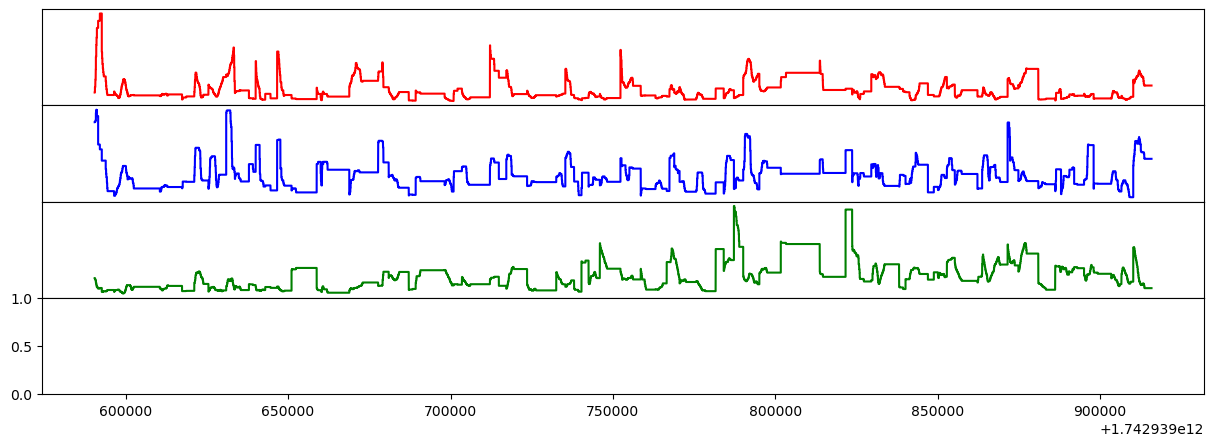

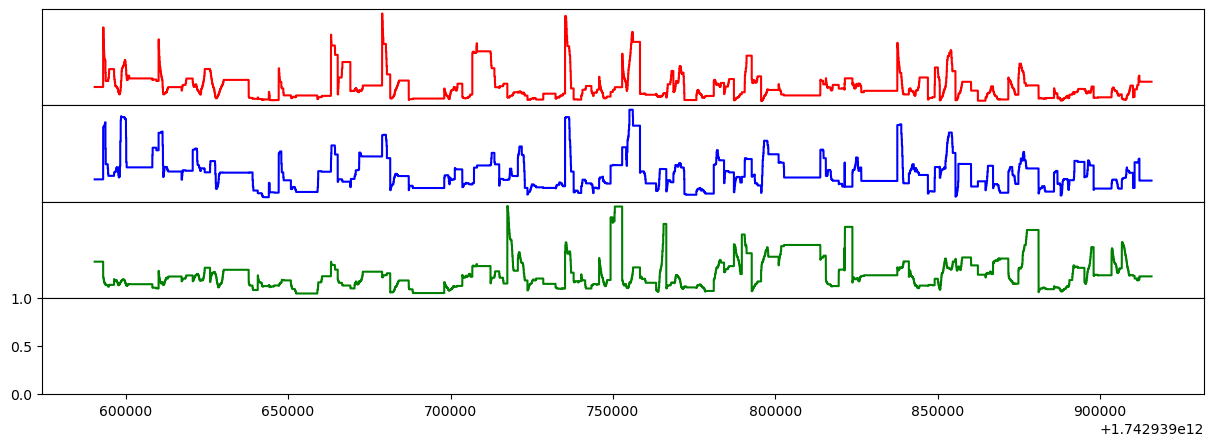

In [35]:
iDisplay(Markdown('## _Example:_'))

dfs = ProcessParticipant(os.path.join(_DATA_DIR, 'P3'), calculate_results=False)
PlotEEGHorizontal(dfs['eeg'], _FREQUENCY_BANDS, _ELECTRODES, _FREQUENCY_COLORS, trial_df=dfs['trial'], suptitle='P6', save_figname=os.path.join(_OUTPUT_DIR, 'P3_eeg_hor'))


## 4b. Plotting Vehicle Gaze VS Distance

_All of these are different ways to plot the vehicle gaze vs distance graphs._

In [39]:
def GazeDistanceKDE(df, xcol, ycol, title, xlabel, ylabel, colormap='viridis', fill:bool=True, threshold:float=0.0, bw_adjust:float=0.0, levels:int=100):
    plt.figure(figsize=(8, 6))
    sns.kdeplot(x=xcol, y=ycol, data=df, cmap=colormap, fill=fill, thresh=threshold, levels=levels)

    # Customize the plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show the plot
    plt.show()

def GazeDistanceHexbin(df, xcol, ycol, title, xlabel, ylabel, colormap='viridis', mincount=1):
    # Plot the 2D histogram (hexbin plot)
    plt.figure(figsize=(8, 6))
    plt.hexbin(df[xcol], df[ycol], gridsize=10, cmap=colormap, mincnt=mincount)

    # Add color bar and labels
    plt.colorbar(label='Frequency')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show the plot
    plt.show()

def GazeDistanceGaussian(df, xcol, ycol, title, xlabel, ylabel, colormap='viridis'):
    # Prepare data
    xy = np.vstack([df[xcol], df[ycol]])

    # Create Gaussian KDE
    kde = stats.gaussian_kde(xy)

    # Create grid for evaluation
    x_grid = np.linspace(df[xcol].min(), df[xcol].max(), 100)
    y_grid = np.linspace(df[ycol].min(), df[ycol].max(), 100)
    X, Y = np.meshgrid(x_grid, y_grid)
    grid_points = np.vstack([X.ravel(), Y.ravel()])

    # Evaluate the density on the grid
    Z = kde(grid_points).reshape(X.shape)

    # Plot the result using contour
    plt.figure(figsize=(8, 6))
    plt.contourf(X, Y, Z, 20, cmap=colormap)

    # Add color bar and labels
    plt.colorbar(label='Density')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Show the plot
    plt.show()

def GazeDistanceScatter(df, xcol, ycol, title, xlabel, ylabel, colormap='viridis'):
    # Generate scatter plot with color indicating density
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=xcol, y=ycol, data=df, palette=colormap, sizes=(50, 200))

    # Add title and labels
    plt.title(title)
    plt.xlabel(xcol)
    plt.ylabel(ycol)

    # Show the plot
    plt.show()

In [38]:
# Helper function: Simple EEG window forming function
def EEGWindows(row, eeg, colnames):
    # Initialize return dict
    return_dict = {}
    # For each freq_band column name, get the prior, during, and after windows
    prior = eeg[eeg['unix_ms'].between(row['unix_ms']-2000, row['unix_ms'])]
    during = eeg[eeg['unix_ms'].between(row['unix_ms']-1000, row['unix_ms']+1000)]
    after = eeg[eeg['unix_ms'].between(row['unix_ms'], row['unix_ms']+2000)]
    for col in colnames:
        #return_dict[f'{col}-Prior'] = prior[f'{col}_normalized'].mean()
        return_dict[f'{col}-During'] = during[f'{col}_normalized'].mean()
        #return_dict[f'{col}-After'] = after[f'{col}_normalized'].mean()
    return return_dict

_PARTICIPANTS_DIRS_2 = [
    'P1',
    'P2',
    'P3',
    'P4',
    'P5',
    'P6' ]

# Generate column names that are important
freq_band_colnames = []
for freq in _FREQUENCY_BANDS: 
    for electrode in _ELECTRODES:
        freq_band_colnames.append(f'{freq}_{electrode}')

evc_dfs = []
for pdir in _PARTICIPANTS_DIRS_2:
    # get the dfs
    dfs = ProcessParticipant(os.path.join(_DATA_DIR, pdir), calculate_results=False)
    
    # Different from our previous steps, we must erive gaze targets in tandem with raw eye positions
    # The difficulty is to find ways to isolate and filter eye fixations that are shorter than a threshold, which we
    # can only do onec we compile eye into gaze.
            
    # Get the gazes from eyese
    gaze_df = GetGazeFromEyes(dfs['eyes'], gaze_threshold=30)
    
    # Merge with eyes, for filtering of eye gazes based on threshold and stuff
    eg_merged_df = pd.merge(dfs['eyes'], gaze_df, how='cross')  # This creates all combinations
    eg_df = eg_merged_df[(eg_merged_df['frame'] >= eg_merged_df['start_frame']) & (eg_merged_df['frame'] < eg_merged_df['end_frame'])]
    eg_df['target_name'] = eg_df['target_name_x']
    eg_df.dropna(subset=['target_name'], inplace=True)
    eg_df.drop(columns=['target_name_x','target_name_y','start_unix_ms','start_frame','end_unix_ms','end_frame','target_name_group','duration_ms'], inplace=True)
    
    # Assign target type based on target name, then remove all that aren't vehicles
    eg_df.dropna(subset=['target_name'], inplace=True)
    eg_df['target_type'] = eg_df['target_name'].apply(lambda x: _OBJECT_TYPE_DICT[x])
    eg_df = eg_df[eg_df['target_type']=='Vehicle']    
    
    # Merge on the condition where value is between start and end
    evt_merged_df = pd.merge(eg_df, dfs['trial'], how='cross')  # This creates all combinations
    evt_df = evt_merged_df[(evt_merged_df['frame'] >= evt_merged_df['start_frame']) & (evt_merged_df['frame'] < evt_merged_df['end_frame'])]
    evt_df.drop(columns=['target_type','car_congestion','start_unix','start_timestamp','start_frame','end_unix','end_timestamp','end_frame'], inplace=True)
        
    # Do the same for trials
    tc_merged_df = pd.merge(dfs['trial'], dfs['crossings'], how='cross')
    tc_df = tc_merged_df[
        (tc_merged_df['start_frame_y'] > tc_merged_df['start_frame_x']) 
        & (tc_merged_df['start_frame_y'] < tc_merged_df['end_frame_x'])]
    tc_df['crossing_onset_unix_ms'] = tc_df['start_unix_ms']
    tc_df['crossing_onset_frame'] = tc_df['start_frame_y']
    tc_df.drop(columns=['car_congestion','start_unix','start_timestamp','start_frame_x','end_unix','end_timestamp','end_frame_x','start_rel_sec','end_unix_ms','end_frame_y','end_rel_sec','group','start_unix_ms','start_frame_y'], inplace=True)
    
    # Now MERGE, then find the offset time between crossing onset and recorded timestamp
    evc_df = pd.merge(evt_df, tc_df, how='left', on='trial_number')
    evc_df['crossing_offset_unix_ms'] = evc_df['unix_ms'] - evc_df['crossing_onset_unix_ms']
    evc_df['crossing_offset_unix_sec'] = evc_df['crossing_offset_unix_ms'] / 1000
    evc_df['crossing_offset_frame'] = evc_df['frame'] - evc_df['crossing_onset_frame']
    
    # Attributing EEG window averages (both prior and after) to each timesetamp.
    evc_eegwindows_df = evc_df.apply(lambda row: EEGWindows(row, dfs['eeg'], freq_band_colnames), axis='columns', result_type='expand')
    evc_df = pd.concat([evc_df, evc_eegwindows_df], axis='columns')
    evc_df.dropna(inplace=True)
    
    # Add results to concatenated list
    evc_dfs.append(evc_df)

# Combine everything into a combined dataframe
global_evc_df = pd.concat(evc_dfs, ignore_index=True)
display(global_evc_df)


## Processing ./data/P1

Initial End Frame: 939
Initial End Timestamp: 20.01333
Initial End Unix MS: 1742844921602
Session End Unix MS: 1742845089786


---

## Processing ./data/P2

Initial End Frame: 1649
Initial End Timestamp: 35.37333
Initial End Unix MS: 1742933125030
Session End Unix MS: 1742933315960


---

## Processing ./data/P3

Initial End Frame: 7537
Initial End Timestamp: 257.1467
Initial End Unix MS: 1742939590456
Session End Unix MS: 1742939915808


---

## Processing ./data/P4

Initial End Frame: 2655
Initial End Timestamp: 67.34667
Initial End Unix MS: 1743003425106
Session End Unix MS: 1743003743345


---

## Processing ./data/P5

Initial End Frame: 1953
Initial End Timestamp: 54.64
Initial End Unix MS: 1743095004293
Session End Unix MS: 1743095199084


---

## Processing ./data/P6

Initial End Frame: 2470
Initial End Timestamp: 65.26667
Initial End Unix MS: 1743103313740
Session End Unix MS: 1743103505881


---

,unix_ms,rel_timestamp,frame,event,side,screen_pos_x,screen_pos_y,screen_pos_z,target_name,trial_number,...,crossing_offset_unix_sec,crossing_offset_frame,Theta_AF7-During,Theta_AF8-During,Alpha_AF7-During,Alpha_AF8-During,Beta_AF7-During,Beta_AF8-During,Gamma_AF7-During,Gamma_AF8-During
0,1742844924032,18.80766,1062,Eye Hit,Left,719.9991,719.8768,49.71414,MicroBus1-Detailed,1,...,-11.523,-708,5.765716,10.290934,3.146017,3.183089,0.662428,1.107476,-0.185502,0.493879
1,1742844924074,18.84751,1064,Eye Hit,Left,733.5851,723.4410,49.73437,MicroBus1-Detailed,1,...,-11.481,-706,5.765716,10.290934,3.146017,3.183089,0.662428,1.107476,-0.185502,0.493879
2,1742844924099,18.86446,1065,Eye Hit,Left,764.1688,726.0804,49.66451,MicroBus1-Detailed,1,...,-11.456,-705,5.765716,10.290934,3.146017,3.183089,0.662428,1.107476,-0.185502,0.493879
3,1742844924116,18.88949,1066,Eye Hit,Left,707.6341,728.0179,49.76483,MicroBus1-Detailed,1,...,-11.439,-704,5.765716,10.290934,3.146017,3.183089,0.662428,1.107476,-0.185502,0.493879
4,1742844924132,18.90676,1067,Eye Hit,Left,723.4066,728.7496,49.77557,MicroBus1-Detailed,1,...,-11.423,-703,5.765716,10.290934,3.146017,3.183089,0.662428,1.107476,-0.185502,0.493879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15093,1743103501823,249.71540,13020,Eye Hit,Left,890.7453,737.6786,48.48265,Car1-Detailed,8,...,-0.896,-41,0.199487,1.344299,0.508827,0.277584,1.530645,11.744378,2.083967,4.100798
15094,1743103501842,249.73380,13021,Eye Hit,Left,909.1449,741.3662,48.20423,Car1-Detailed,8,...,-0.877,-40,0.199487,1.344299,0.508827,0.277584,1.530645,11.744378,2.083967,4.100798
15095,1743103501860,249.75380,13022,Eye Hit,Left,919.7576,743.4106,48.03367,Car1-Detailed,8,...,-0.859,-39,0.199487,1.344299,0.508827,0.277584,1.530645,11.744378,2.083967,4.100798
15096,1743103501878,249.77090,13023,Eye Hit,Left,937.7755,746.7086,47.72229,Car1-Detailed,8,...,-0.841,-38,0.199487,1.344299,0.508827,0.277584,1.530645,11.744378,2.083967,4.100798


/Users/ryankim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ryankim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


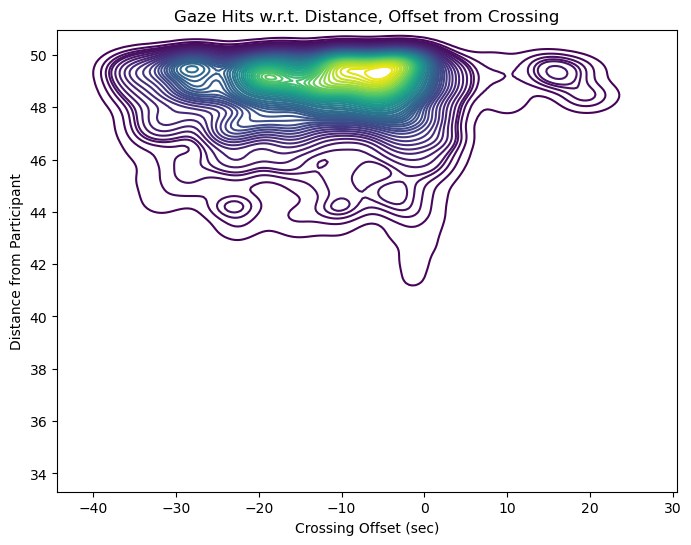

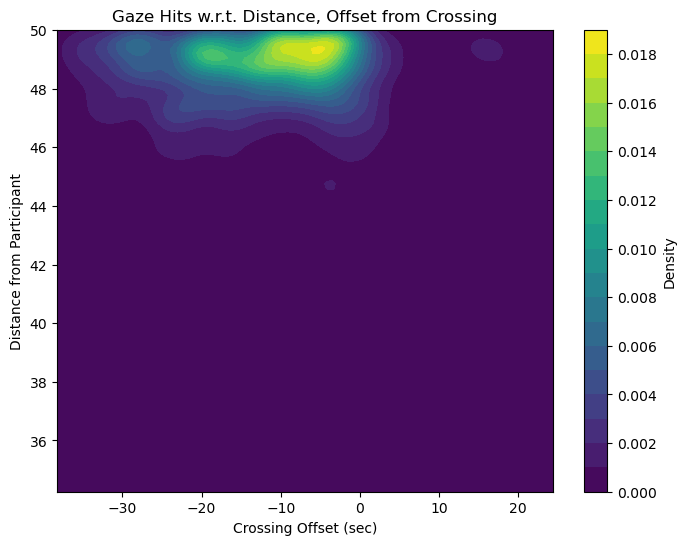

/var/folders/r7/zkk06b910nd7ysr86dhn0yqh0000gn/T/ipykernel_3696/1904543322.py:59: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=xcol, y=ycol, data=df, palette=colormap, sizes=(50, 200))


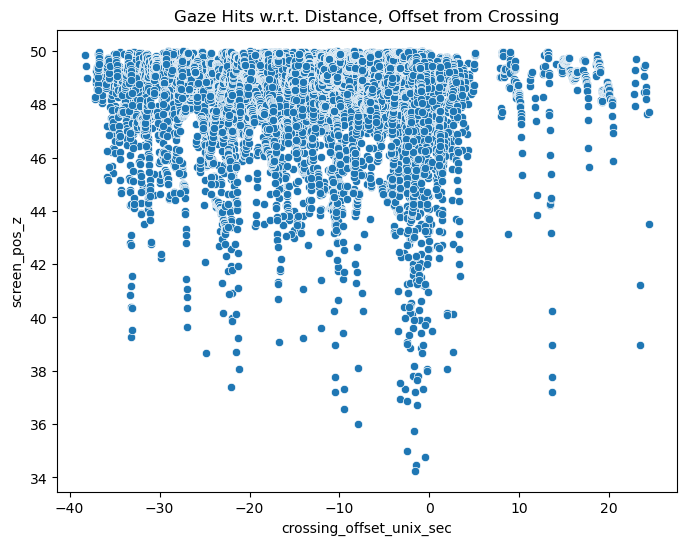

In [40]:
GazeDistanceKDE(
    global_evc_df, 
    xcol='crossing_offset_unix_sec', 
    ycol='screen_pos_z',
    title='Gaze Hits w.r.t. Distance, Offset from Crossing', 
    xlabel='Crossing Offset (sec)',
    ylabel='Distance from Participant',
    fill=False,
    levels=50,
    bw_adjust=0.5
)

GazeDistanceGaussian(
    global_evc_df, 
    xcol='crossing_offset_unix_sec', 
    ycol='screen_pos_z',
    title='Gaze Hits w.r.t. Distance, Offset from Crossing', 
    xlabel='Crossing Offset (sec)',
    ylabel='Distance from Participant'
)

GazeDistanceScatter(
    global_evc_df, 
    xcol='crossing_offset_unix_sec', 
    ycol='screen_pos_z',
    title='Gaze Hits w.r.t. Distance, Offset from Crossing', 
    xlabel='Crossing Offset (sec)',
    ylabel='Distance from Participant'
)

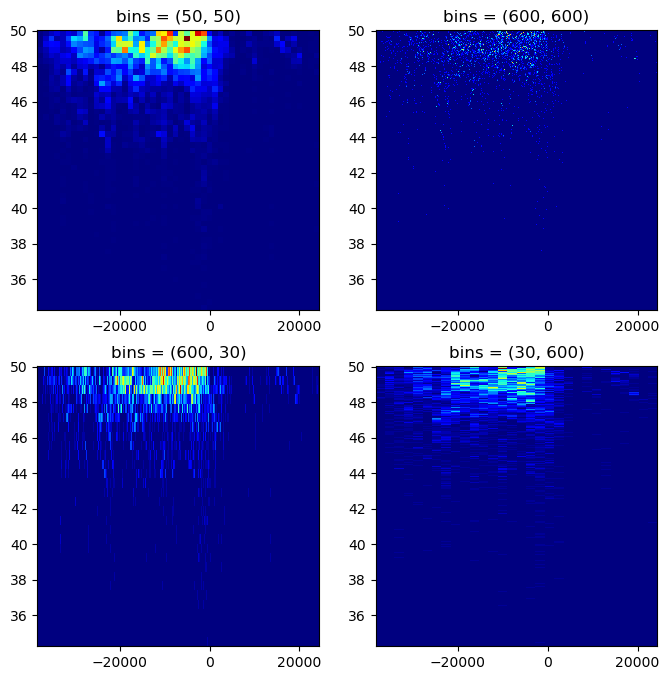

In [41]:
# This is another way to plot the same data
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

# Prepare data
x = global_evc_df['crossing_offset_unix_ms']
y = global_evc_df['screen_pos_z']

# Big bins
axs[0,0].hist2d(x, y, bins=(50, 50), cmap=plt.cm.jet)
axs[0, 0].set_title('bins = (50, 50)')
 
# Small bins
axs[0,1].hist2d(x, y, bins=(600, 600), cmap=plt.cm.jet)
axs[0, 1].set_title('bins = (600, 600)')
 
# If you do not set the same values for X and Y, the bins won't be a square!
axs[1,0].hist2d(x, y, bins=(600, 30), cmap=plt.cm.jet)
axs[1, 0].set_title('bins = (600, 30)')

# If you do not set the same values for X and Y, the bins won't be a square!
axs[1,1].hist2d(x, y, bins=(30, 600), cmap=plt.cm.jet)
axs[1, 1].set_title('bins = (30, 600)')

plt.show()

## Correlations - Revisited

Correlating EEG averages prior to and after gaze onset with gazes.

In [42]:
evceeg_df = evc_df.drop(columns=[
    'unix_ms',
    'rel_timestamp',
    'frame',
    'event',
    'side',
    'target_name',
    'trial_number',
    'crossing_onset_unix_ms',
    'crossing_onset_frame',
    'crossing_offset_unix_sec',
    'crossing_offset_frame'
])
display(evceeg_df)

,screen_pos_x,screen_pos_y,screen_pos_z,crossing_offset_unix_ms,Theta_AF7-During,Theta_AF8-During,Alpha_AF7-During,Alpha_AF8-During,Beta_AF7-During,Beta_AF8-During,Gamma_AF7-During,Gamma_AF8-During
0,772.9710,757.5264,49.80455,-20248,4.409160,49.841335,2.158222,5.285813,1.508710,3.261620,0.848057,2.435225
1,830.7580,759.6190,49.36785,-20227,4.464132,50.052578,2.161424,5.285813,1.502248,3.260903,0.823909,2.437431
2,796.3632,756.2581,49.66198,-20210,4.475574,50.106576,2.160953,5.285813,1.500782,3.261086,0.818144,2.437875
3,877.8955,750.0079,48.75986,-20171,4.522772,50.202833,2.164392,5.285813,1.495307,3.261413,0.797858,2.438668
4,936.4153,749.9167,47.79942,-20143,4.541988,50.291560,2.163683,5.285813,1.492854,3.261714,0.788231,2.439399
...,...,...,...,...,...,...,...,...,...,...,...,...
2397,890.7453,737.6786,48.48265,-896,0.199487,1.344299,0.508827,0.277584,1.530645,11.744378,2.083967,4.100798
2398,909.1449,741.3662,48.20423,-877,0.199487,1.344299,0.508827,0.277584,1.530645,11.744378,2.083967,4.100798
2399,919.7576,743.4106,48.03367,-859,0.199487,1.344299,0.508827,0.277584,1.530645,11.744378,2.083967,4.100798
2400,937.7755,746.7086,47.72229,-841,0.199487,1.344299,0.508827,0.277584,1.530645,11.744378,2.083967,4.100798


In [43]:
s,p = MultipleCorrelations(evceeg_df, method='spearman', display_df=False)
s_relevant = s[s.index.isin(['screen_pos_z','crossing_offset_unix_ms'])]
s_relevant.drop(columns=['screen_pos_x','screen_pos_y','screen_pos_z','crossing_offset_unix_ms'], inplace=True)
p_relevant = p[p.index.isin(['screen_pos_z','crossing_offset_unix_ms'])]
p_relevant.drop(columns=['screen_pos_x','screen_pos_y','screen_pos_z','crossing_offset_unix_ms'], inplace=True)

display(s_relevant)
display(p_relevant)

,Theta_AF7-During,Theta_AF8-During,Alpha_AF7-During,Alpha_AF8-During,Beta_AF7-During,Beta_AF8-During,Gamma_AF7-During,Gamma_AF8-During
screen_pos_z,-0.052172,0.247624,0.016156,0.199787,-0.076111,-0.047220,-0.042937,-0.085333
crossing_offset_unix_ms,-0.103533,0.080142,0.028098,-0.100891,-0.042029,0.036031,0.090438,-0.219950


,Theta_AF7-During,Theta_AF8-During,Alpha_AF7-During,Alpha_AF8-During,Beta_AF7-During,Beta_AF8-During,Gamma_AF7-During,Gamma_AF8-During
screen_pos_z,1.054604e-02,6.880221e-35,0.428690,4.771736e-23,0.000189,0.020649,0.035360,2.818511e-05
crossing_offset_unix_ms,3.672431e-07,8.422098e-05,0.168627,7.241463e-07,0.039430,0.077470,0.000009,1.055511e-27


## Individual Frequency Bands

In [45]:
def IsolateSignificances(s,p,freq):
    cols = [
        f'{freq}_AF7-During',
        f'{freq}_AF8-During' 
    ]

    display(s[cols])
    display(p[cols])

iDisplay(Markdown('### Theta:'))
IsolateSignificances(s_relevant, p_relevant, 'Theta')

iDisplay(Markdown('### Alpha:'))
IsolateSignificances(s_relevant, p_relevant, 'Alpha')

iDisplay(Markdown('### Beta:'))
IsolateSignificances(s_relevant, p_relevant, 'Beta')

iDisplay(Markdown('### Gamma:'))
IsolateSignificances(s_relevant, p_relevant, 'Gamma')

### Theta:

,Theta_AF7-During,Theta_AF8-During
screen_pos_z,-0.052172,0.247624
crossing_offset_unix_ms,-0.103533,0.080142


,Theta_AF7-During,Theta_AF8-During
screen_pos_z,1.054604e-02,6.880221e-35
crossing_offset_unix_ms,3.672431e-07,8.422098e-05


### Alpha:

,Alpha_AF7-During,Alpha_AF8-During
screen_pos_z,0.016156,0.199787
crossing_offset_unix_ms,0.028098,-0.100891


,Alpha_AF7-During,Alpha_AF8-During
screen_pos_z,0.428690,4.771736e-23
crossing_offset_unix_ms,0.168627,7.241463e-07


### Beta:

,Beta_AF7-During,Beta_AF8-During
screen_pos_z,-0.076111,-0.047220
crossing_offset_unix_ms,-0.042029,0.036031


,Beta_AF7-During,Beta_AF8-During
screen_pos_z,0.000189,0.020649
crossing_offset_unix_ms,0.039430,0.077470


### Gamma:

,Gamma_AF7-During,Gamma_AF8-During
screen_pos_z,-0.042937,-0.085333
crossing_offset_unix_ms,0.090438,-0.219950


,Gamma_AF7-During,Gamma_AF8-During
screen_pos_z,0.035360,2.818511e-05
crossing_offset_unix_ms,0.000009,1.055511e-27


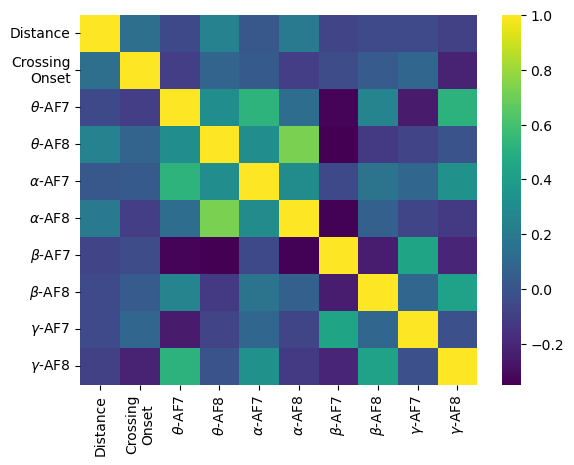

In [46]:
s_plot = s.drop(
    columns=['screen_pos_x','screen_pos_y'],
    index=['screen_pos_x','screen_pos_y']
)

s_plot.rename(columns={
    'screen_pos_z':'Distance',
    'crossing_offset_unix_ms':'Crossing\nOnset',
    'Theta_AF7-During':r'$\theta$-AF7',
    'Theta_AF8-During':r'$\theta$-AF8',
    'Alpha_AF7-During':r'$\alpha$-AF7',
    'Alpha_AF8-During':r'$\alpha$-AF8',
    'Beta_AF7-During':r'$\beta$-AF7',
    'Beta_AF8-During':r'$\beta$-AF8',
    'Gamma_AF7-During':r'$\gamma$-AF7',
    'Gamma_AF8-During':r'$\gamma$-AF8',
}, inplace=True)

sns.heatmap(s_plot, 
    xticklabels=s_plot.columns.values, 
    yticklabels=s_plot.columns.values, 
    #cmap="YlGnBu",
    cmap='viridis',
    annot=False)
#plt.tight_layout()
plt.savefig(os.path.join(_OUTPUT_DIR, 'spearman_correlations'), bbox_inches='tight', pad_inches=0.1)

<Axes: >

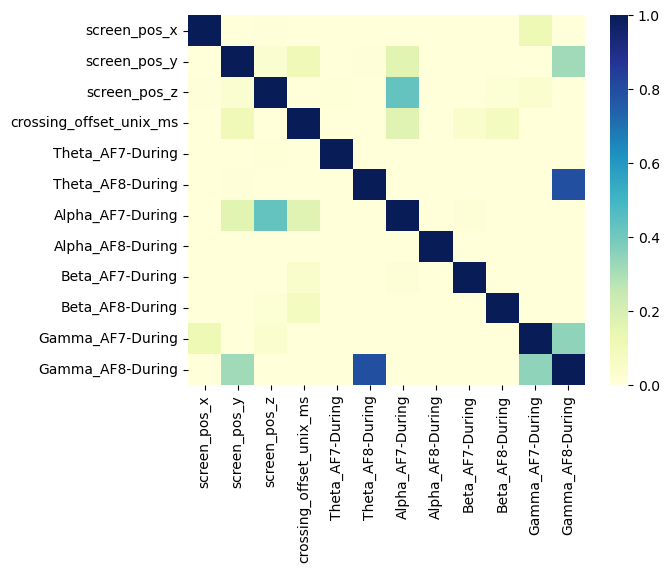

In [47]:
sns.heatmap(p, 
    xticklabels=p.columns.values, 
    yticklabels=p.columns.values, 
    cmap="YlGnBu",
    annot=False)

/var/folders/r7/zkk06b910nd7ysr86dhn0yqh0000gn/T/ipykernel_3696/4049997530.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g0 = sns.scatterplot(
/Users/ryankim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ryankim/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


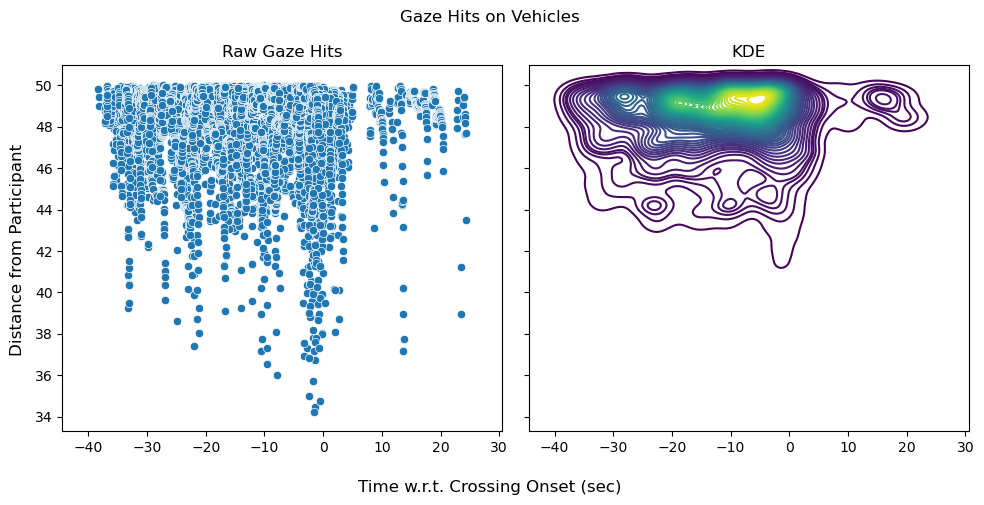

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True)

# Commons
fig.set_figheight(5)
fig.set_figwidth(10)
fig.suptitle('Gaze Hits on Vehicles')
fig.supxlabel('Time w.r.t. Crossing Onset (sec)')
fig.supylabel('Distance from Participant')

# Scatter
#axes[0].title.set_text('Raw Gaze hits')
g0 = sns.scatterplot(
    x='crossing_offset_unix_sec', 
    y='screen_pos_z', 
    data=global_evc_df, 
    palette='viridis', 
    sizes=(50, 200),
    ax=axes[0]
)
g0.set(title='Raw Gaze Hits', xlabel=None, ylabel=None)

# KDE Plot
#axes[1].title.set_text('KDE')
g1 = sns.kdeplot(
    x='crossing_offset_unix_sec', 
    y='screen_pos_z', 
    data=global_evc_df, 
    cmap='viridis', 
    fill=False, 
    thresh=0, 
    levels=50, 
    ax=axes[1]
)
g1.set(title='KDE', xlabel=None, ylabel=None)

# Show
plt.tight_layout()
plt.savefig(os.path.join(_OUTPUT_DIR,'gazefrequencies.png'), bbox_inches="tight", pad_inches=0.1)
plt.show()